In [1]:
%load_ext autoreload
%autoreload 2

import sys
import os
sys.path.insert(0, "../")

import motiflets.motiflets as ml
from motiflets.competitors import *
import motiflets.plotting as ml_plt

import subprocess
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

import warnings
warnings.simplefilter("ignore")


datasets = ["001_UCR_Anomaly_35000.txt",
            "002_UCR_Anomaly_35000.txt",
            "003_UCR_Anomaly_35000.txt",
            "004_UCR_Anomaly_2500.txt",
            "005_UCR_Anomaly_4000.txt",
            "006_UCR_Anomaly_4000.txt",
            "007_UCR_Anomaly_4000.txt",
            "008_UCR_Anomaly_4000.txt",
            "009_UCR_Anomaly_4000.txt",
            "010_UCR_Anomaly_4000.txt",
            "011_UCR_Anomaly_10000.txt",
            "012_UCR_Anomaly_15000.txt",
            "013_UCR_Anomaly_15000.txt",
            "014_UCR_Anomaly_8000.txt",
            "015_UCR_Anomaly_5000.txt",
            "016_UCR_Anomaly_5000.txt",
            "017_UCR_Anomaly_5000.txt",
            "018_UCR_Anomaly_8000.txt",
            "019_UCR_Anomaly_5000.txt",
            "020_UCR_Anomaly_5000.txt",
            "021_UCR_Anomaly_5000.txt",
            "022_UCR_Anomaly_4000.txt",
            "023_UCR_Anomaly_5000.txt",
            "024_UCR_Anomaly_3200.txt",
            "025_UCR_Anomaly_2800.txt",
           ]

ml_plt.save_fig = False

In [2]:
radii = []
extents = []

for dataset in datasets:
    ds_name = dataset.split("_")[0]
    file = "synthetic/synthetic_" + ds_name + ".csv"

    series, df_gt = ml.read_dataset_with_index(file) # , sampling_factor=np.inf
    #    ml_plt.plot_dataset(file, series, ds_name=ds_name, ground_truth=df_gt)
    
    dd = np.array(df_gt.Implanted.values[0]).astype(np.int32)
    m = np.int32(dd[0,1]-dd[0,0])

    data = series.to_numpy()
    D_full = ml.compute_distances_full(data, m)
    r_top1 = ml.get_radius(D_full, dd[:,0])
    e_top1 = ml.get_pairwise_extent(D_full, dd[:,0])
    k_top1 = len(dd)
        

    #print("Ground truth:",
    #      "\n\tk:", str(k_top1),
    #      "\n\tradius:", str(r_top1),
    #      "\n\textent:", str(e_top1),          
    #      "\n\tlength:", str(m))
    
    radii.append(r_top1)
    extents.append(e_top1)

Dataset Original Length n:  11400
Dataset Sampled Length n:  11400
../datasets/ground_truth/synthetic/synthetic_001_gt.csv
Dataset Original Length n:  10000
Dataset Sampled Length n:  10000
../datasets/ground_truth/synthetic/synthetic_002_gt.csv
Dataset Original Length n:  11429
Dataset Sampled Length n:  11429
../datasets/ground_truth/synthetic/synthetic_003_gt.csv
Dataset Original Length n:  10999
Dataset Sampled Length n:  10999
../datasets/ground_truth/synthetic/synthetic_004_gt.csv
Dataset Original Length n:  8183
Dataset Sampled Length n:  8183
../datasets/ground_truth/synthetic/synthetic_005_gt.csv
Dataset Original Length n:  8183
Dataset Sampled Length n:  8183
../datasets/ground_truth/synthetic/synthetic_006_gt.csv
Dataset Original Length n:  8183
Dataset Sampled Length n:  8183
../datasets/ground_truth/synthetic/synthetic_007_gt.csv
Dataset Original Length n:  8183
Dataset Sampled Length n:  8183
../datasets/ground_truth/synthetic/synthetic_008_gt.csv
Dataset Original Length 

# Radii, Extent and Diameter

The extent of the implanted motif set lies between the radius and the diameter.

Text(0.5, 1.0, 'Radius/Extent/Diameter of Motif Sets')

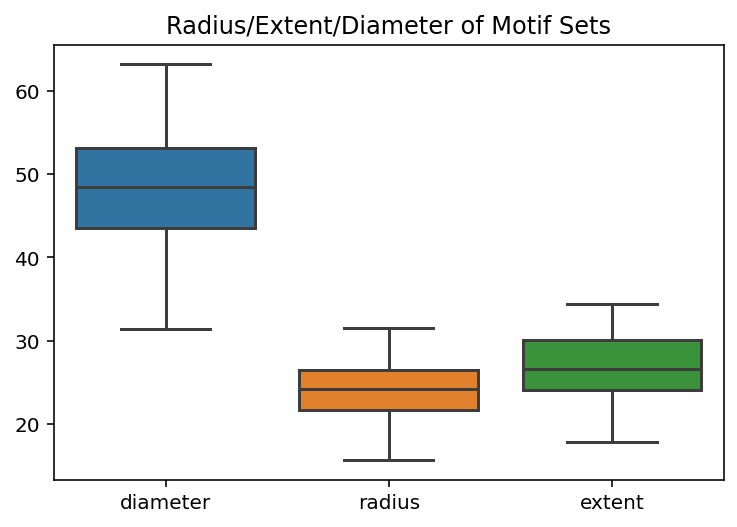

In [3]:
import seaborn as sns
import pandas as pd

df = pd.DataFrame()
df["diameter"] = 2*np.array(radii)
df["radius"] = np.array(radii)
df["extent"] = extents
ax = sns.boxplot(data=df)
ax.set_title("Radius/Extent/Diameter of Motif Sets")

Dataset Original Length n:  11400
Dataset Sampled Length n:  11400
../datasets/ground_truth/synthetic/synthetic_001_gt.csv


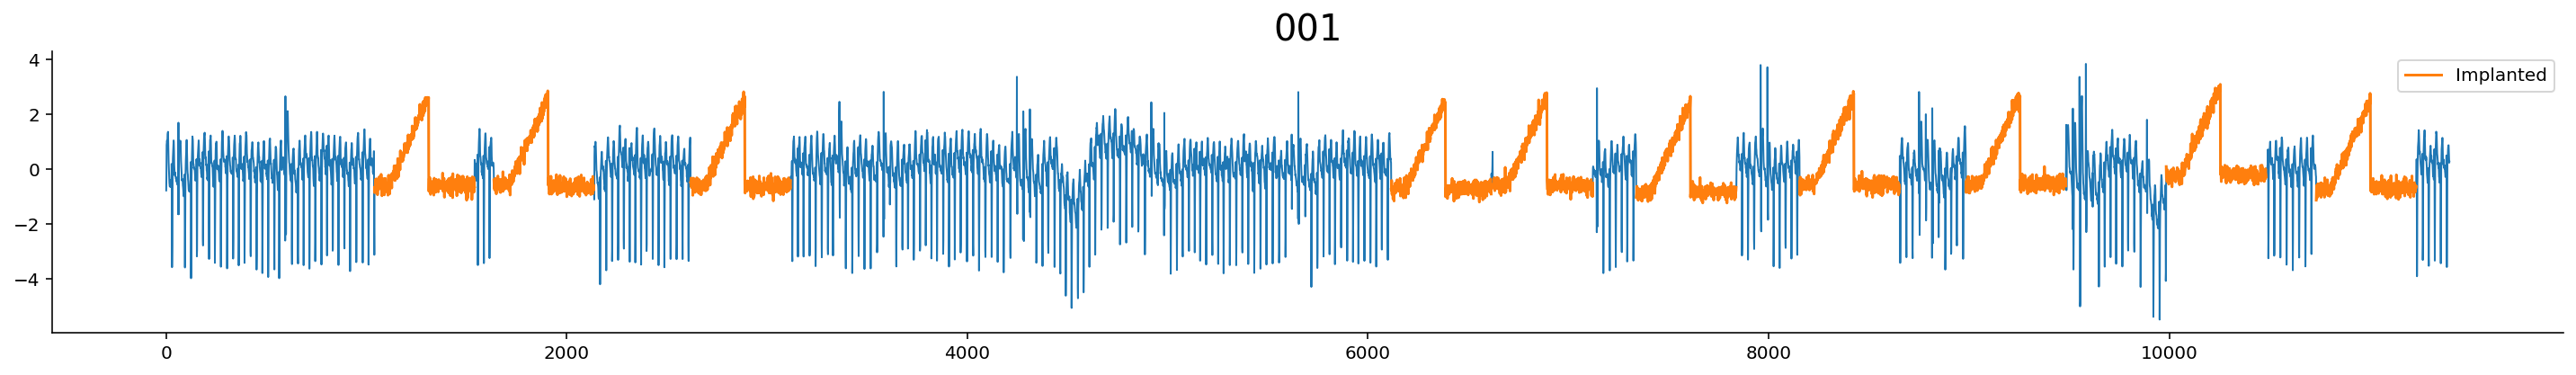

Ground truth: 
	k: 10 
	radius: 28.704660425649415 
	length: 500
--------Motiflets:-------- 1.0
[1040, 7339, 6623, 8155, 9985, 8985, 6116, 10734, 1636, 2618]
-----------------------------
Dataset Original Length n:  10000
Dataset Sampled Length n:  10000
../datasets/ground_truth/synthetic/synthetic_002_gt.csv


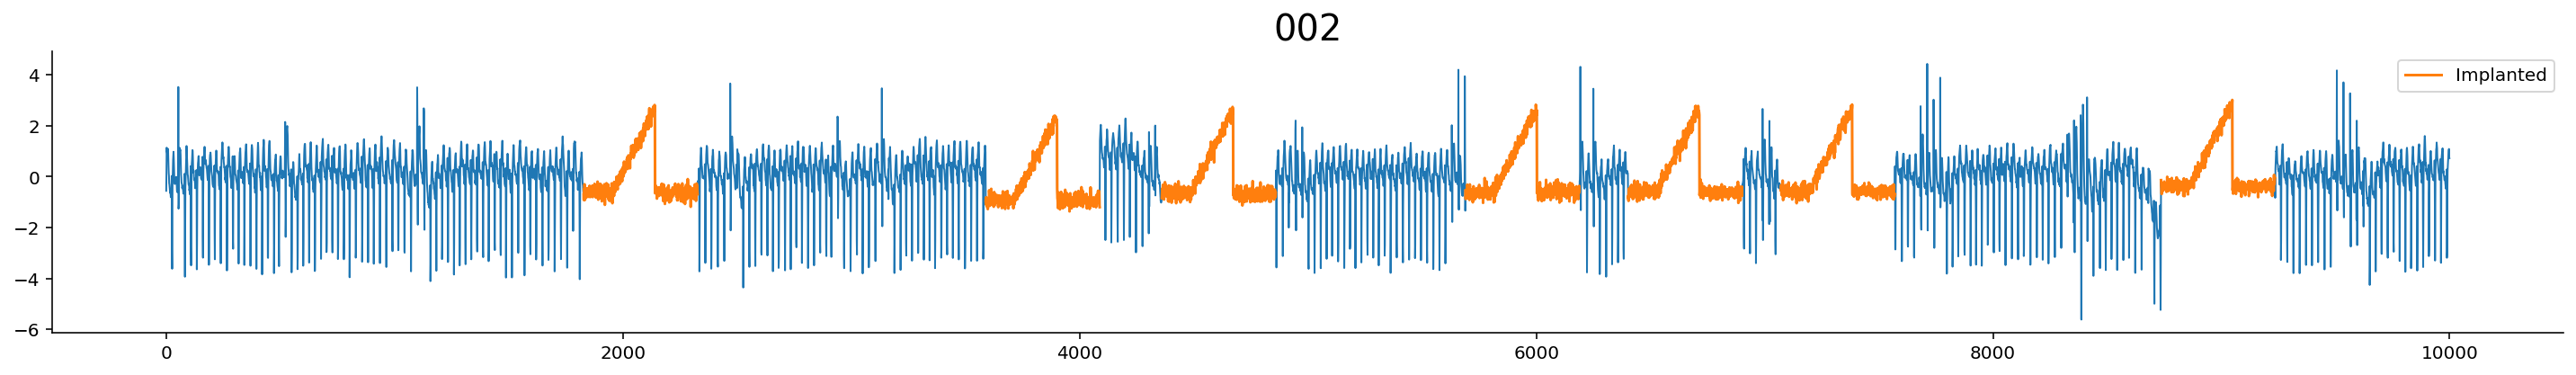

Ground truth: 
	k: 7 
	radius: 29.82566262291504 
	length: 500
--------Motiflets:-------- 1.0
[1828, 8736, 4360, 6402, 7071, 5690, 3589]
-----------------------------
Dataset Original Length n:  11429
Dataset Sampled Length n:  11429
../datasets/ground_truth/synthetic/synthetic_003_gt.csv


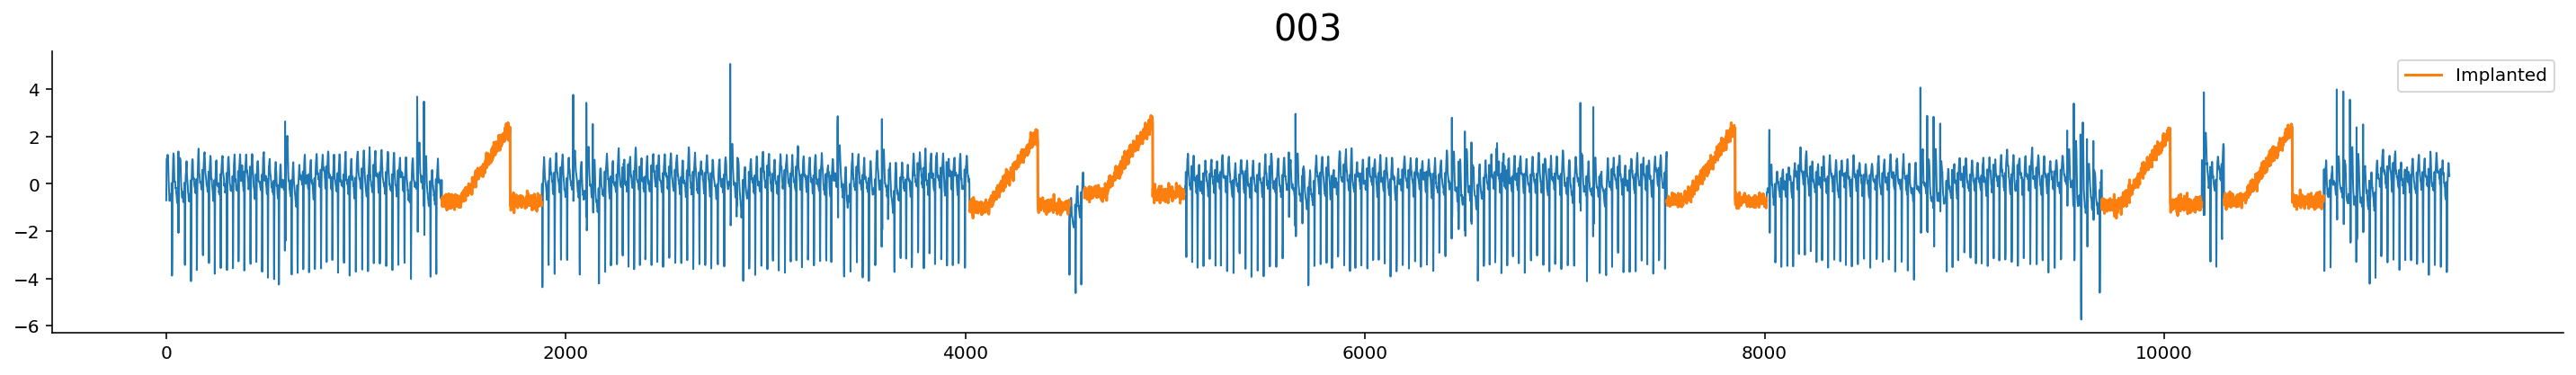

Ground truth: 
	k: 6 
	radius: 26.53755570458008 
	length: 500
--------Motiflets:-------- 1.0
[1380, 4021, 7511, 10300, 9689, 4596]
-----------------------------
Dataset Original Length n:  10999
Dataset Sampled Length n:  10999
../datasets/ground_truth/synthetic/synthetic_004_gt.csv


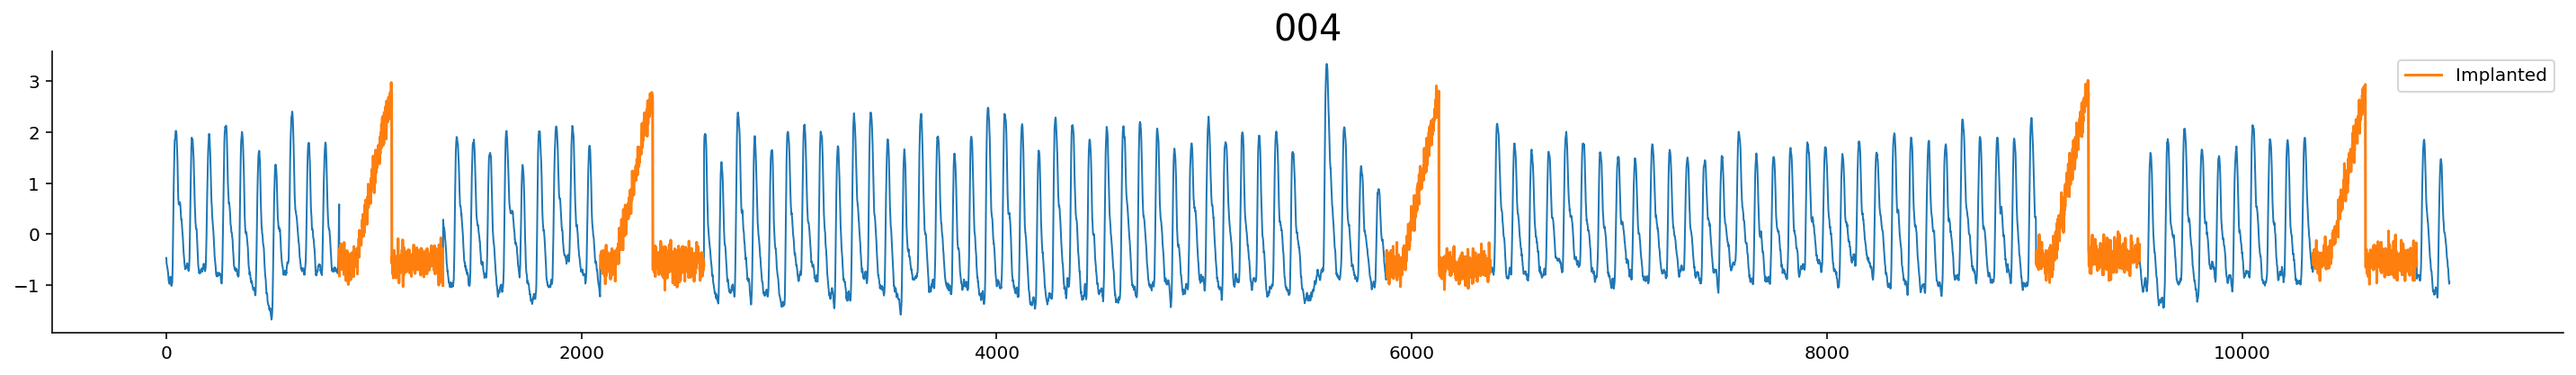

Ground truth: 
	k: 5 
	radius: 27.548778543935548 
	length: 500
--------Motiflets:-------- 0.0
[6872, 7622, 7289, 8367, 6456]
-----------------------------
Dataset Original Length n:  8183
Dataset Sampled Length n:  8183
../datasets/ground_truth/synthetic/synthetic_005_gt.csv


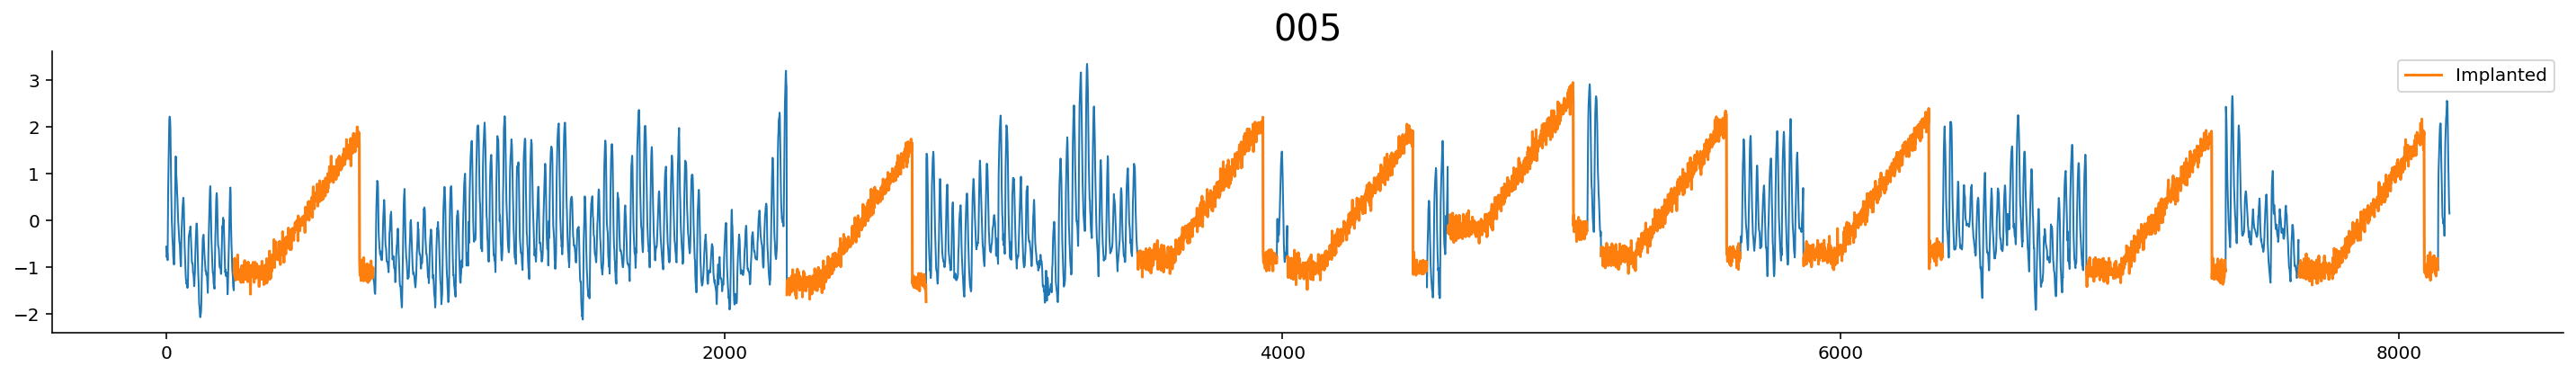

Ground truth: 
	k: 9 
	radius: 20.176246653066407 
	length: 500
--------Motiflets:-------- 1.0
[243, 2224, 5142, 4018, 6881, 5867, 4593, 3481, 7642]
-----------------------------
Dataset Original Length n:  8183
Dataset Sampled Length n:  8183
../datasets/ground_truth/synthetic/synthetic_006_gt.csv


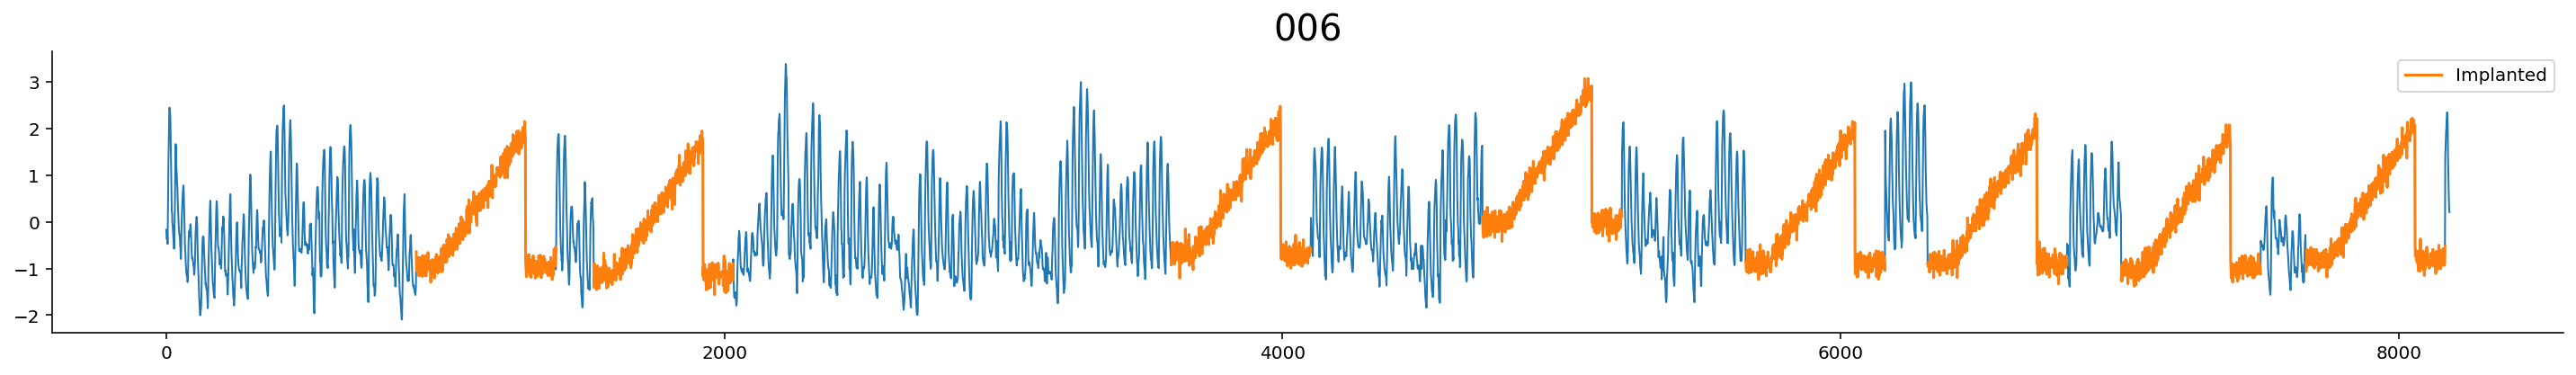

Ground truth: 
	k: 8 
	radius: 22.49298668907715 
	length: 500
--------Motiflets:-------- 1.0
[896, 7667, 7006, 6312, 4717, 5660, 3602, 1532]
-----------------------------
Dataset Original Length n:  8183
Dataset Sampled Length n:  8183
../datasets/ground_truth/synthetic/synthetic_007_gt.csv


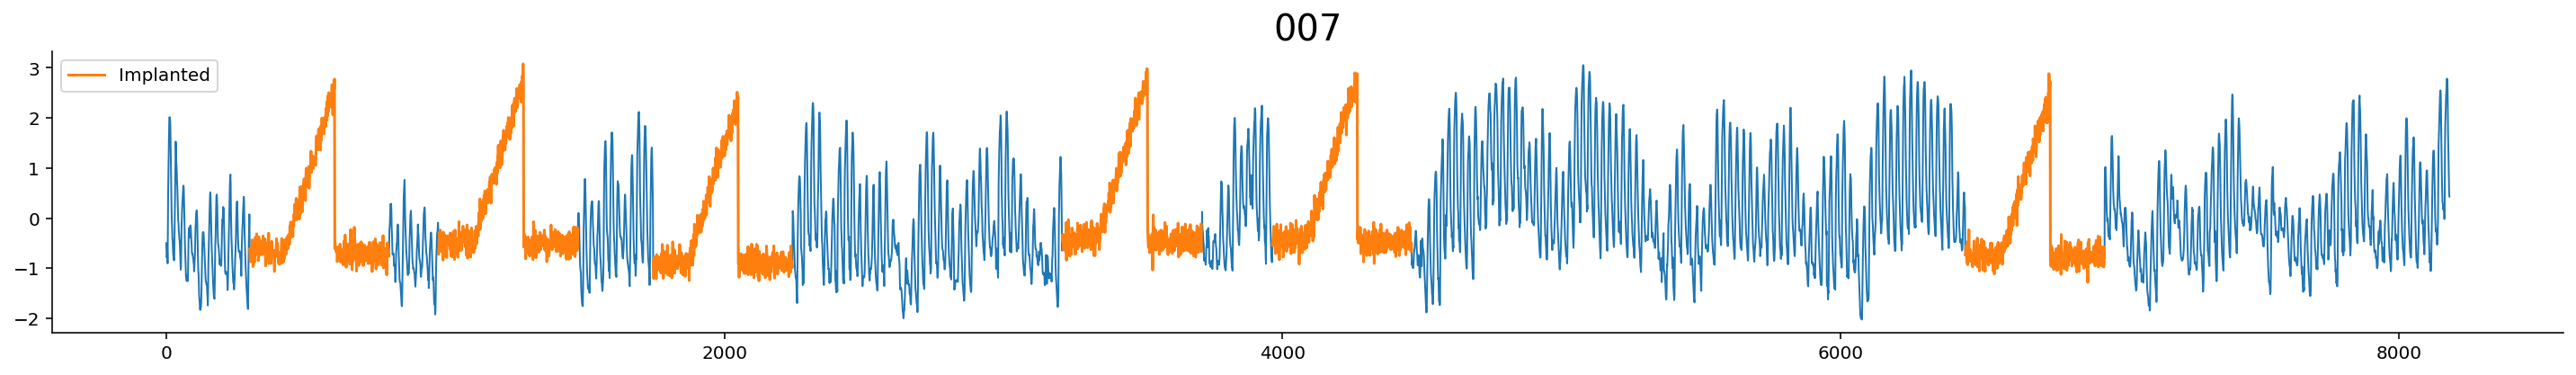

Ground truth: 
	k: 6 
	radius: 25.12343979881836 
	length: 500
--------Motiflets:-------- 1.0
[299, 1745, 976, 6447, 3964, 3212]
-----------------------------
Dataset Original Length n:  8183
Dataset Sampled Length n:  8183
../datasets/ground_truth/synthetic/synthetic_008_gt.csv


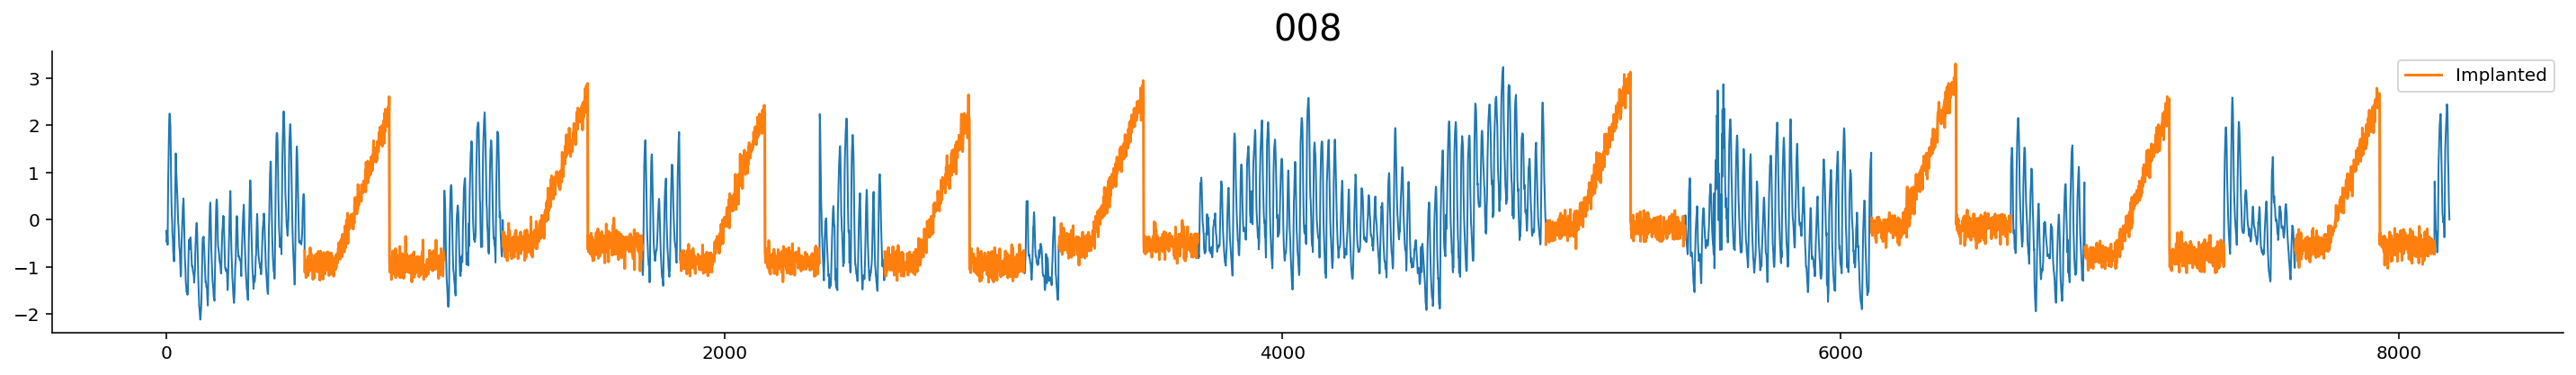

Ground truth: 
	k: 9 
	radius: 26.532203684316407 
	length: 500
--------Motiflets:-------- 1.0
[496, 6875, 3199, 1842, 7629, 6111, 4944, 2575, 1207]
-----------------------------
Dataset Original Length n:  8183
Dataset Sampled Length n:  8183
../datasets/ground_truth/synthetic/synthetic_009_gt.csv


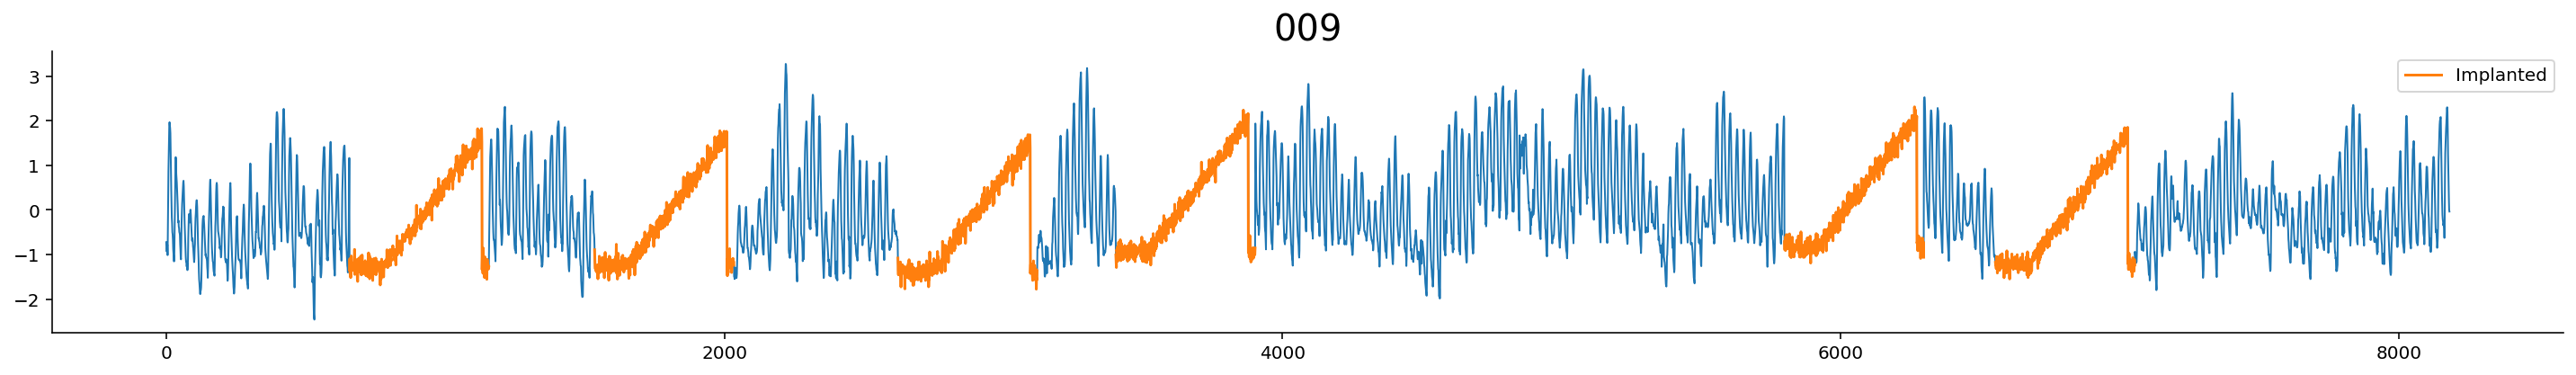

Ground truth: 
	k: 6 
	radius: 18.408544550405274 
	length: 500
--------Motiflets:-------- 1.0
[657, 3403, 6555, 2622, 1535, 5799]
-----------------------------
Dataset Original Length n:  8183
Dataset Sampled Length n:  8183
../datasets/ground_truth/synthetic/synthetic_010_gt.csv


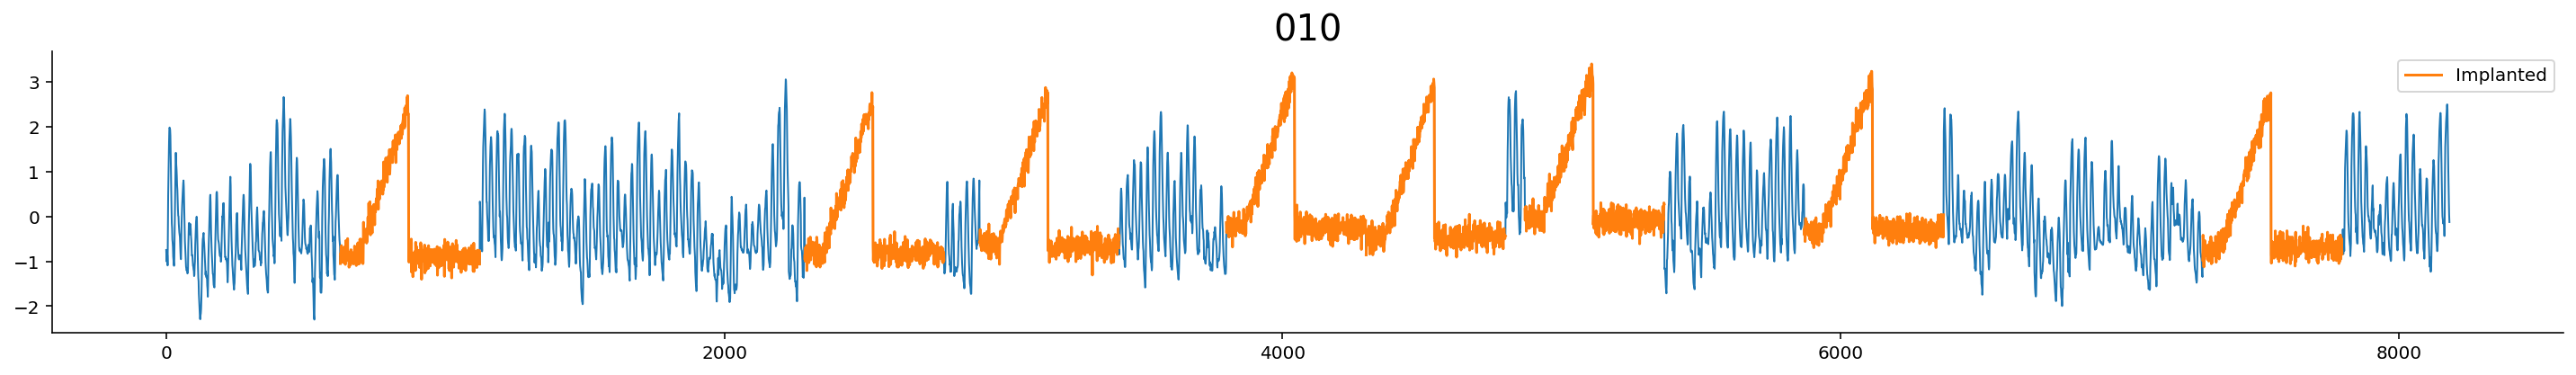

Ground truth: 
	k: 8 
	radius: 27.212894449697266 
	length: 500
--------Motiflets:-------- 1.0
[624, 3799, 5870, 2915, 2288, 7298, 4869, 4300]
-----------------------------
Dataset Original Length n:  15000
Dataset Sampled Length n:  15000
../datasets/ground_truth/synthetic/synthetic_011_gt.csv


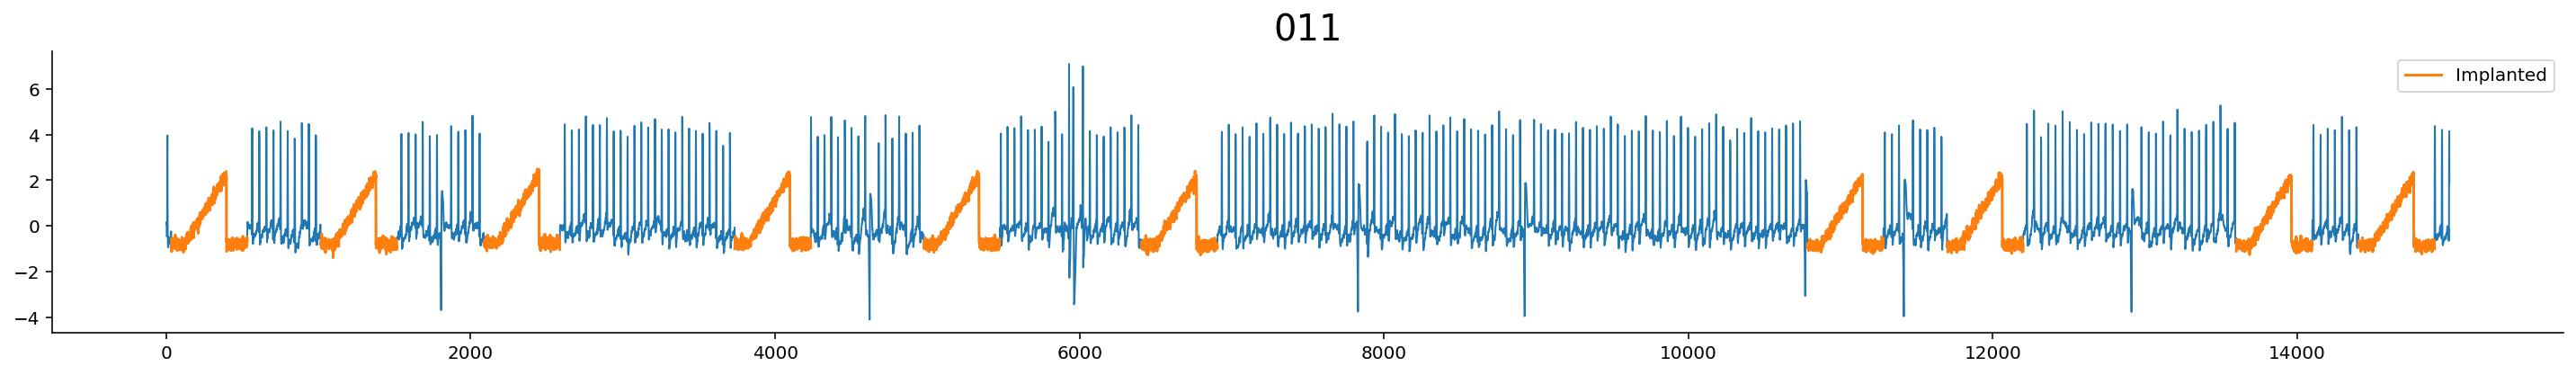

Ground truth: 
	k: 10 
	radius: 21.832347879873048 
	length: 500
--------Motiflets:-------- 1.0
[33, 3735, 6406, 13599, 10781, 4977, 11699, 14402, 1015, 2087]
-----------------------------
Dataset Original Length n:  15000
Dataset Sampled Length n:  15000
../datasets/ground_truth/synthetic/synthetic_012_gt.csv


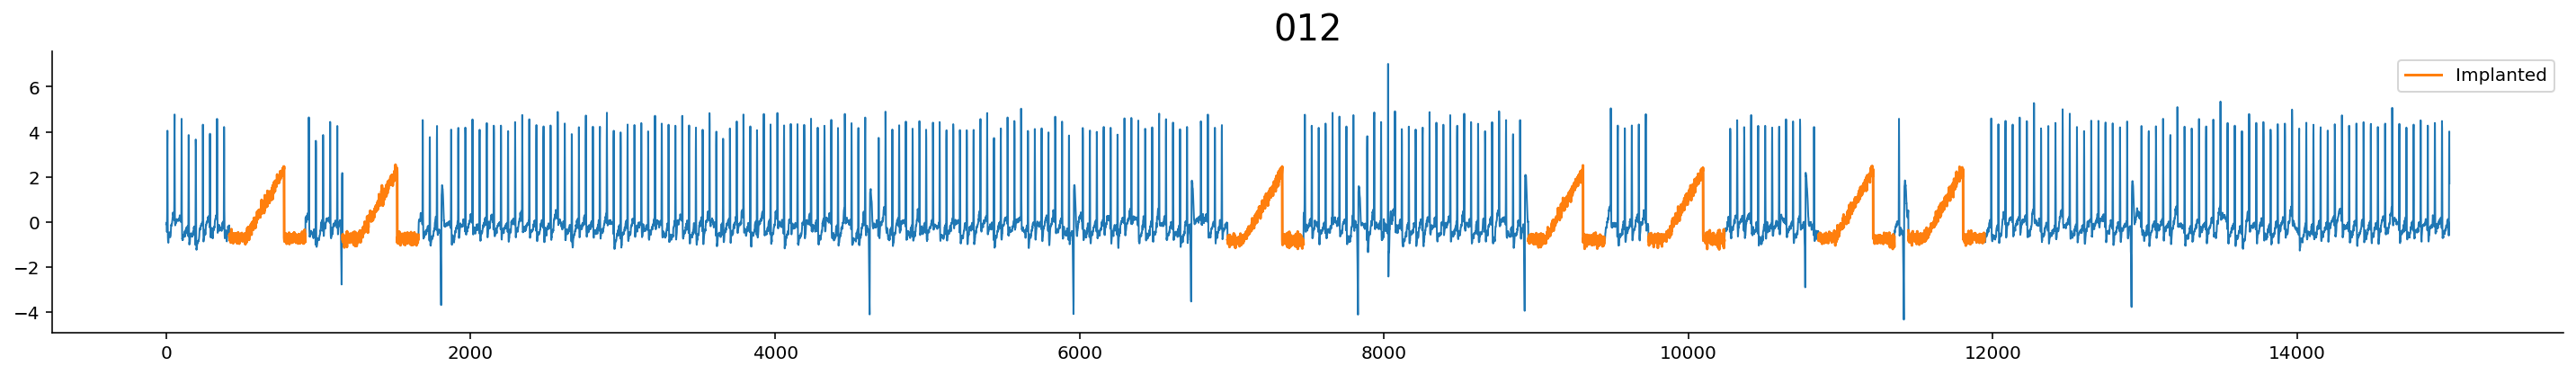

Ground truth: 
	k: 7 
	radius: 21.359264383779298 
	length: 500
--------Motiflets:-------- 1.0
[415, 1158, 11445, 6972, 8948, 9737, 10854]
-----------------------------
Dataset Original Length n:  15000
Dataset Sampled Length n:  15000
../datasets/ground_truth/synthetic/synthetic_013_gt.csv


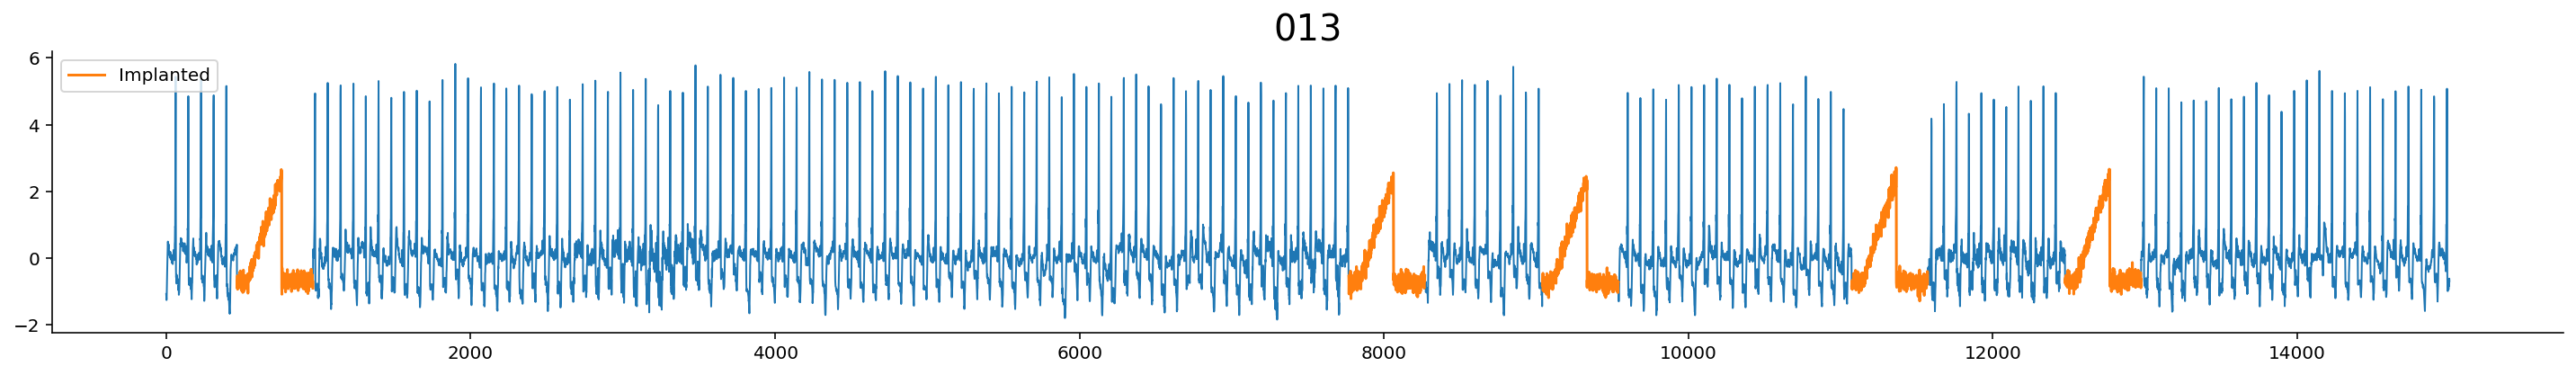

Ground truth: 
	k: 5 
	radius: 24.749261866079102 
	length: 500
--------Motiflets:-------- 1.0
[465, 11072, 12474, 9040, 7769]
-----------------------------
Dataset Original Length n:  15000
Dataset Sampled Length n:  15000
../datasets/ground_truth/synthetic/synthetic_014_gt.csv


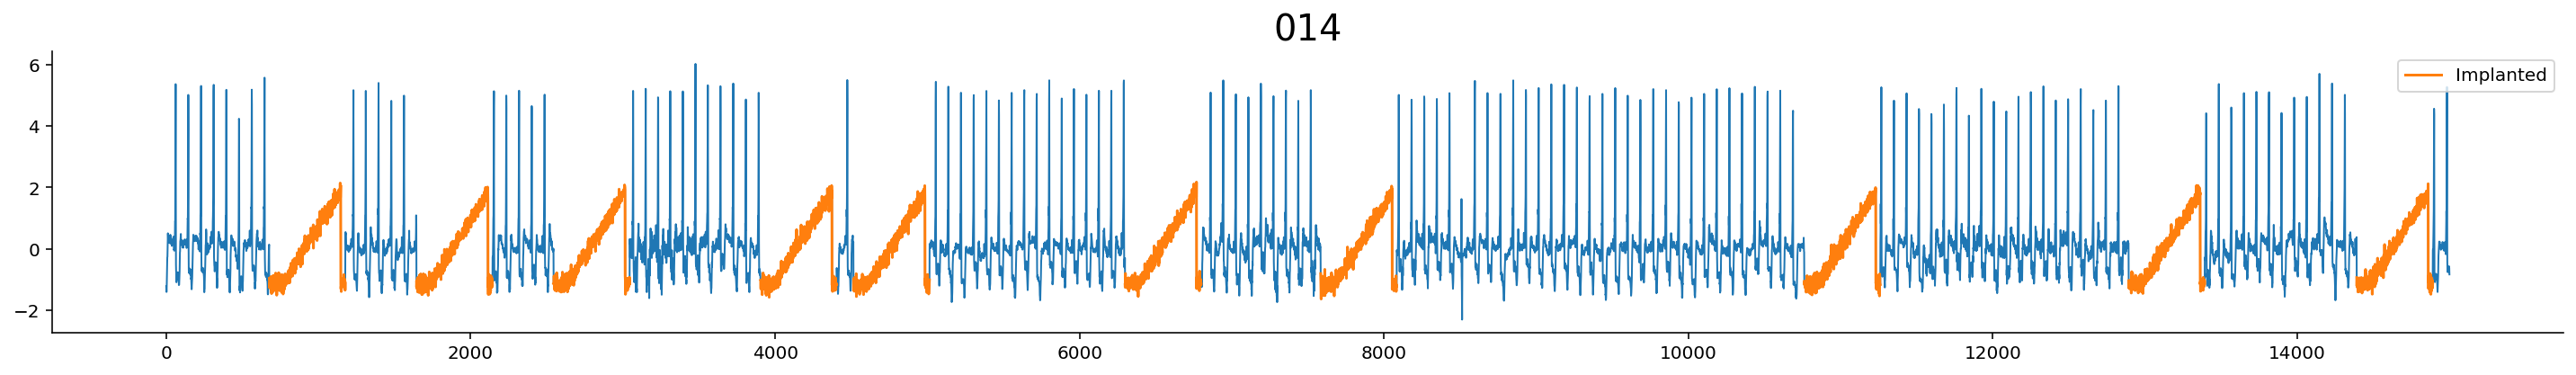

Ground truth: 
	k: 10 
	radius: 22.59834672020508 
	length: 500
--------Motiflets:-------- 1.0
[677, 6299, 14390, 7584, 2545, 12892, 3904, 10761, 1644, 4515]
-----------------------------
Dataset Original Length n:  10527
Dataset Sampled Length n:  10527
../datasets/ground_truth/synthetic/synthetic_015_gt.csv


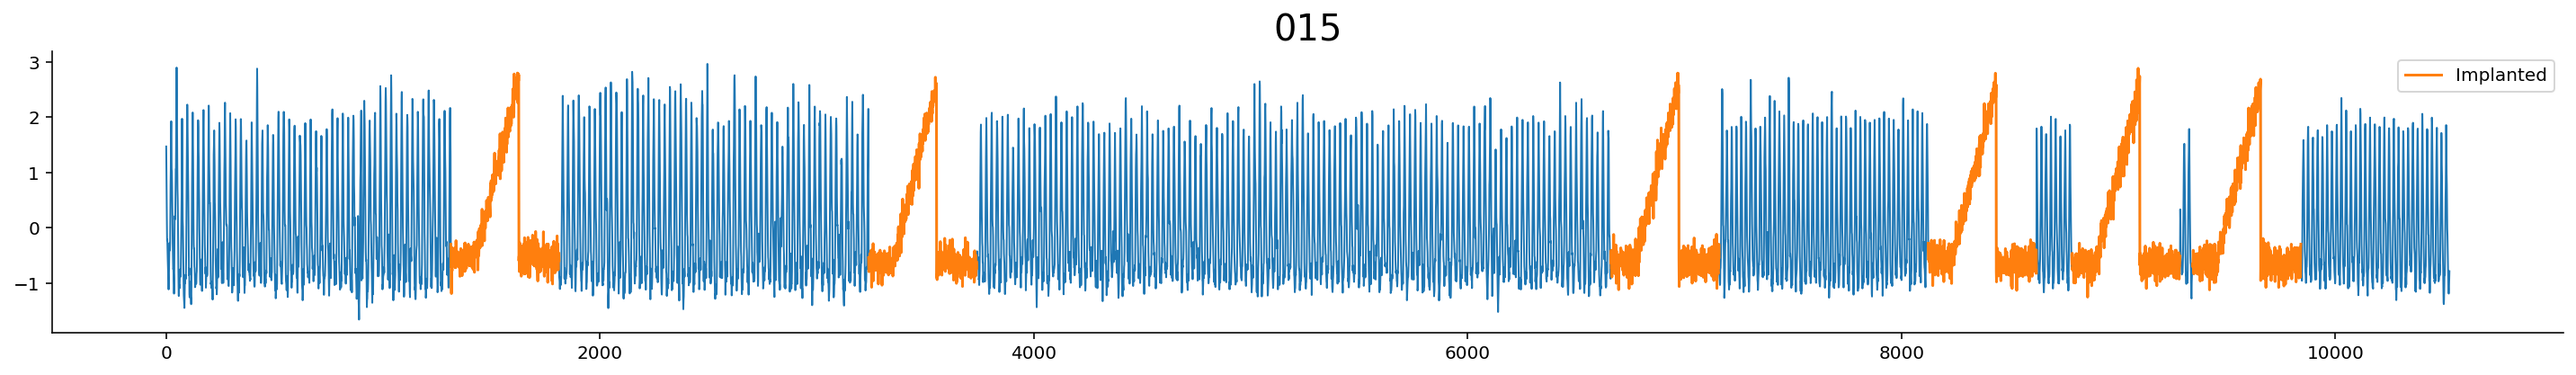

Ground truth: 
	k: 6 
	radius: 30.379669199453126 
	length: 500
--------Motiflets:-------- 1.0
[1312, 3238, 8123, 9342, 8785, 6660]
-----------------------------
Dataset Original Length n:  15000
Dataset Sampled Length n:  15000
../datasets/ground_truth/synthetic/synthetic_016_gt.csv


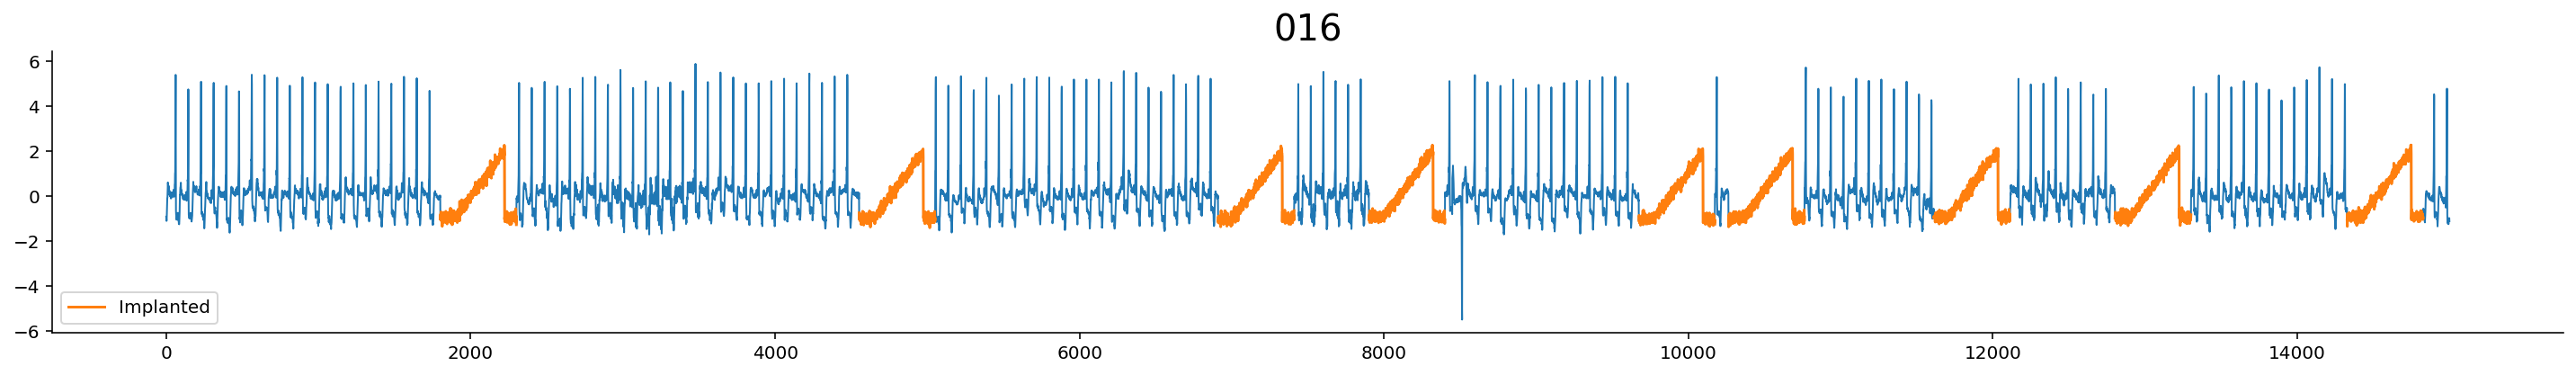

Ground truth: 
	k: 9 
	radius: 21.770458231435548 
	length: 500
--------Motiflets:-------- 1.0
[1801, 12802, 9674, 14327, 11612, 7901, 6910, 4552, 10263]
-----------------------------
Dataset Original Length n:  15000
Dataset Sampled Length n:  15000
../datasets/ground_truth/synthetic/synthetic_017_gt.csv


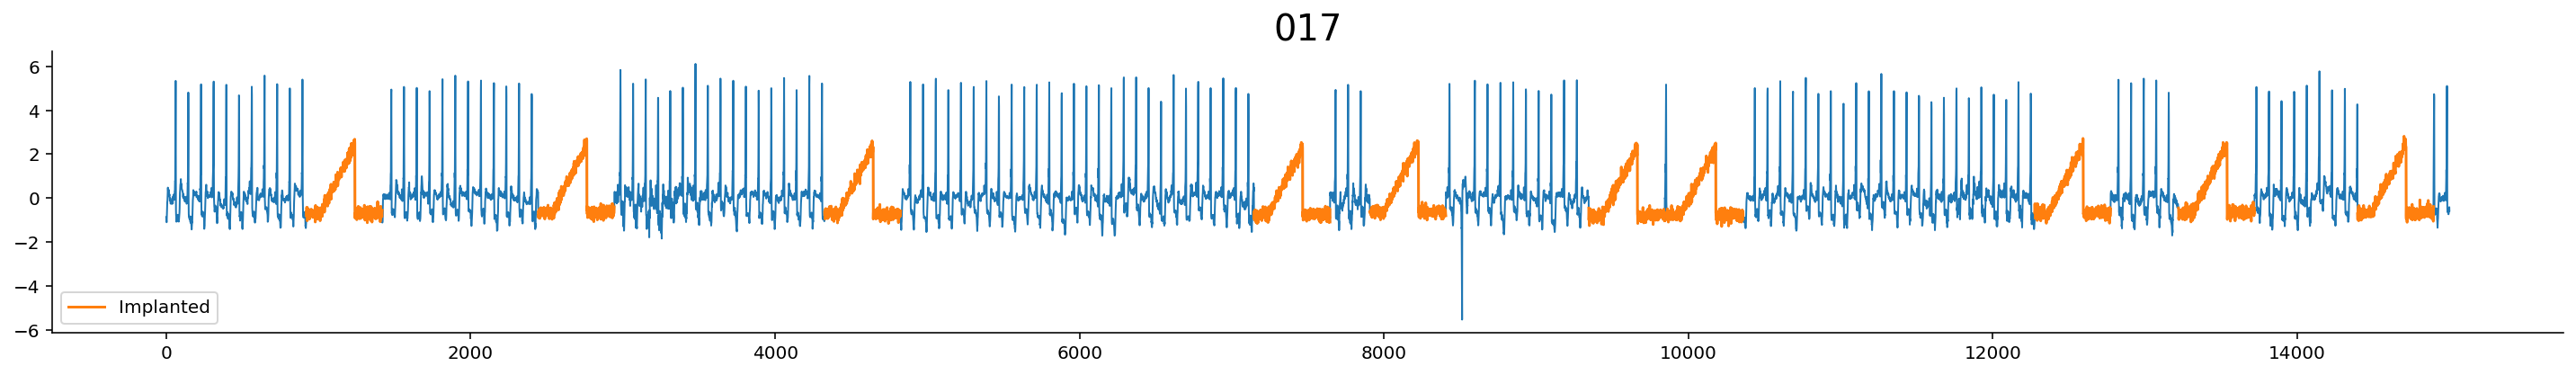

Ground truth: 
	k: 10 
	radius: 25.224695215688477 
	length: 500
--------Motiflets:-------- 1.0
[920, 7907, 4325, 12274, 2444, 9860, 7146, 9345, 13219, 14395]
-----------------------------
Dataset Original Length n:  15000
Dataset Sampled Length n:  15000
../datasets/ground_truth/synthetic/synthetic_018_gt.csv


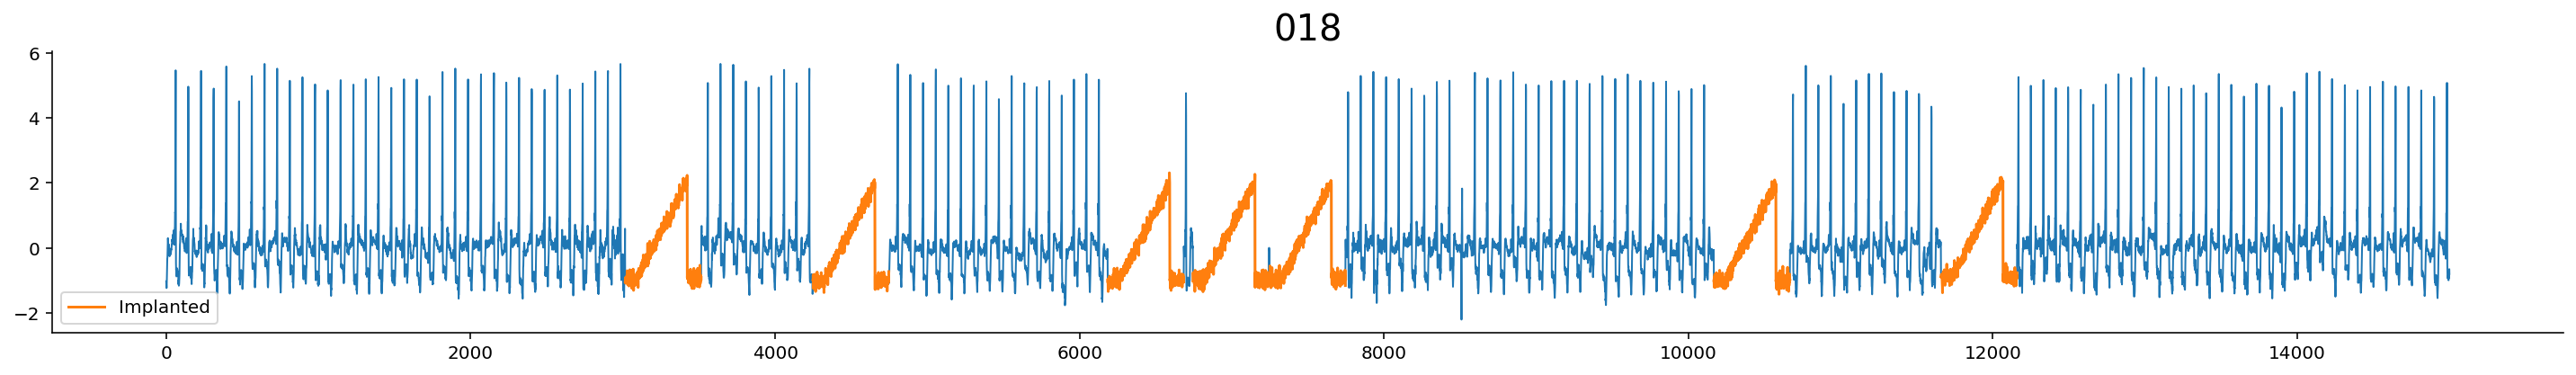

Ground truth: 
	k: 7 
	radius: 18.54098893211914 
	length: 500
--------Motiflets:-------- 1.0
[3015, 6185, 4248, 11659, 6745, 7247, 10167]
-----------------------------
Dataset Original Length n:  11999
Dataset Sampled Length n:  11999
../datasets/ground_truth/synthetic/synthetic_019_gt.csv


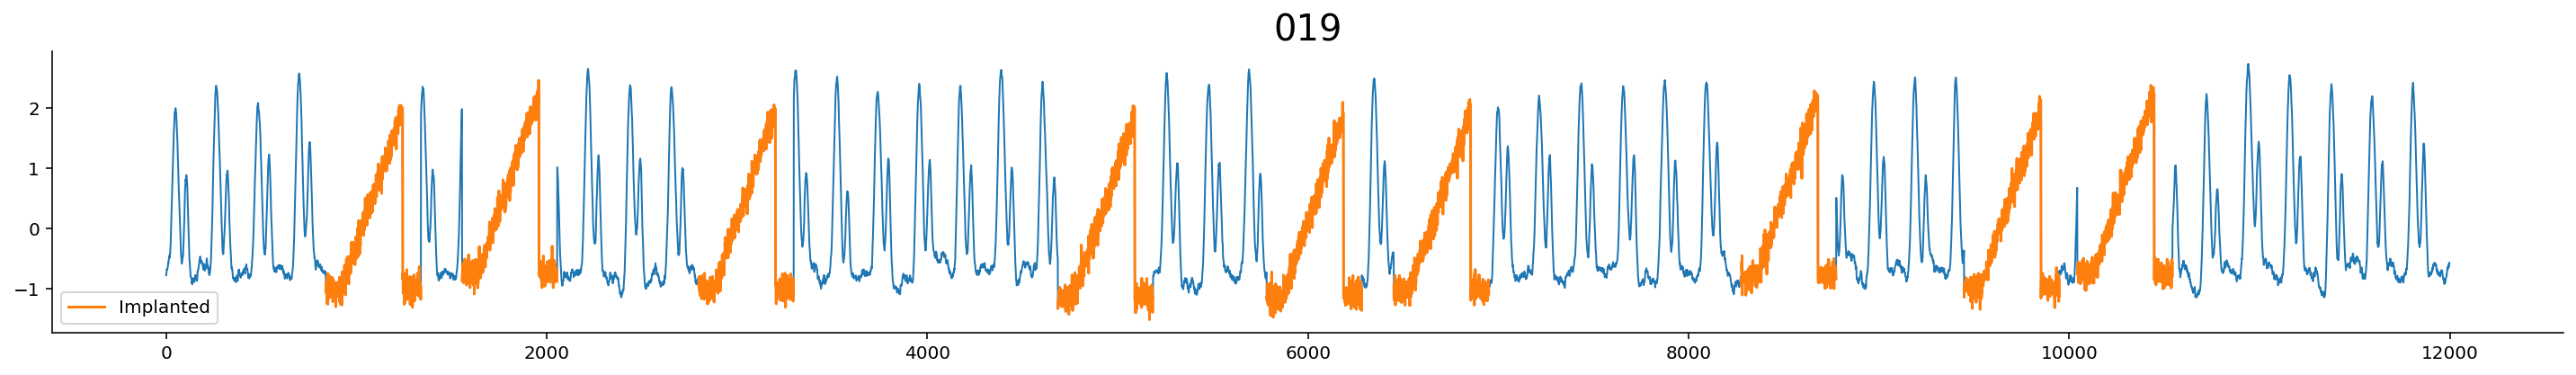

Ground truth: 
	k: 9 
	radius: 15.742388735280763 
	length: 500
--------Motiflets:-------- 1.0
[839, 9448, 4686, 1555, 2798, 5783, 6451, 10043, 8276]
-----------------------------
Dataset Original Length n:  11999
Dataset Sampled Length n:  11999
../datasets/ground_truth/synthetic/synthetic_020_gt.csv


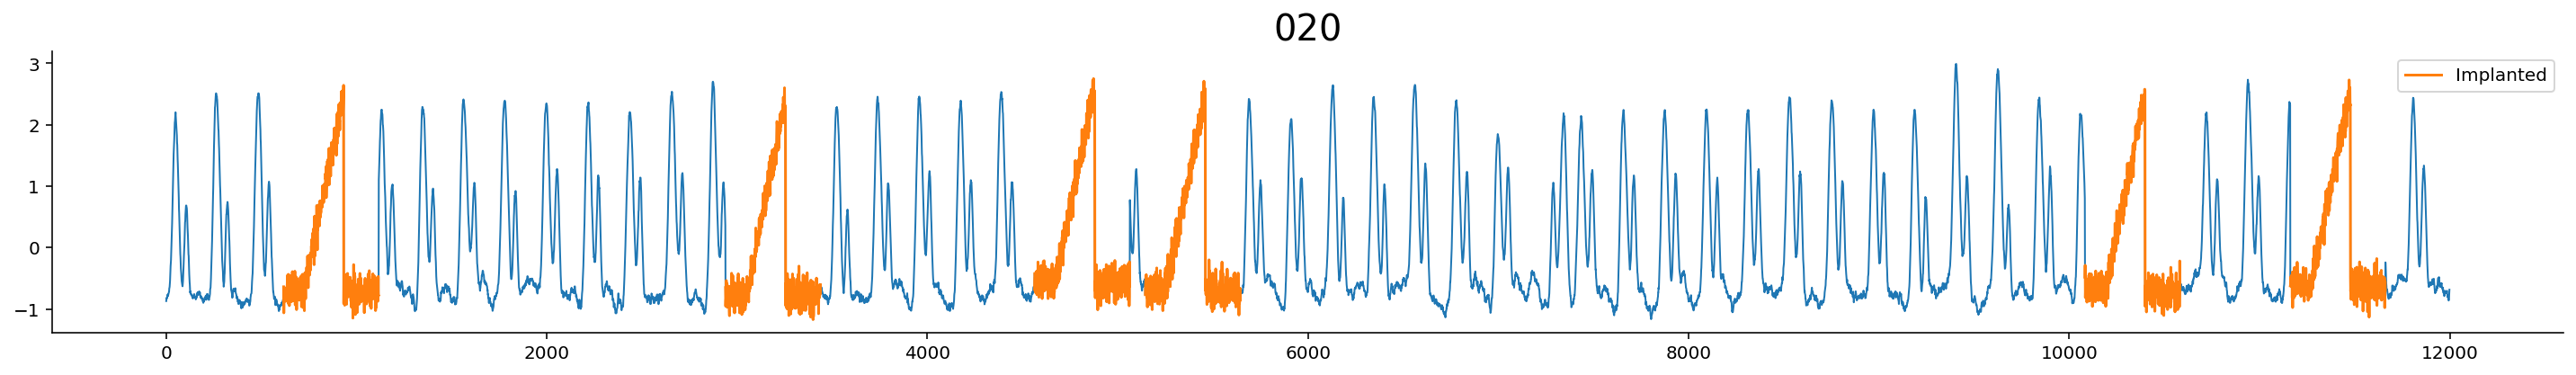

Ground truth: 
	k: 6 
	radius: 24.21492386864258 
	length: 500
--------Motiflets:-------- 0.16666666666666666
[7826, 7388, 5643, 8703, 3689, 1949]
-----------------------------
Dataset Original Length n:  11999
Dataset Sampled Length n:  11999
../datasets/ground_truth/synthetic/synthetic_021_gt.csv


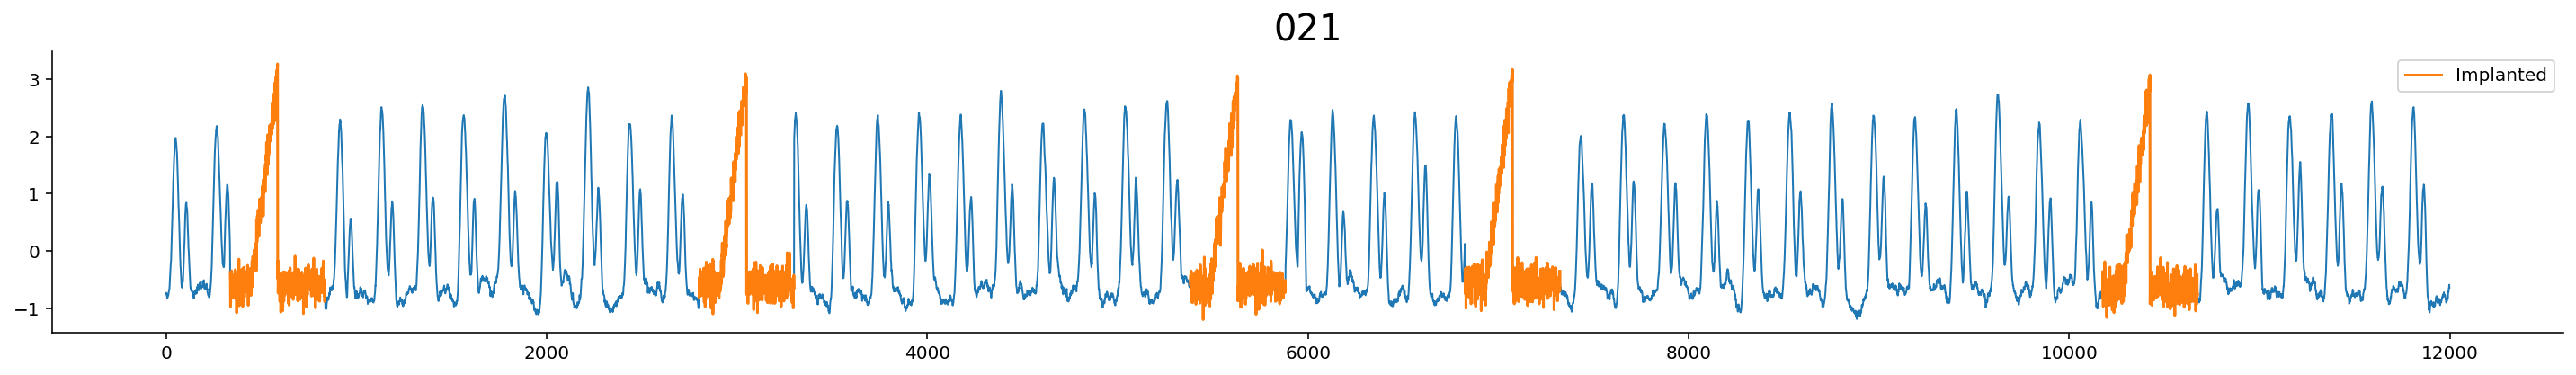

Ground truth: 
	k: 5 
	radius: 31.56640626 
	length: 500
--------Motiflets:-------- 0.0
[3494, 4795, 11345, 1101, 4143]
-----------------------------
Dataset Original Length n:  11999
Dataset Sampled Length n:  11999
../datasets/ground_truth/synthetic/synthetic_022_gt.csv


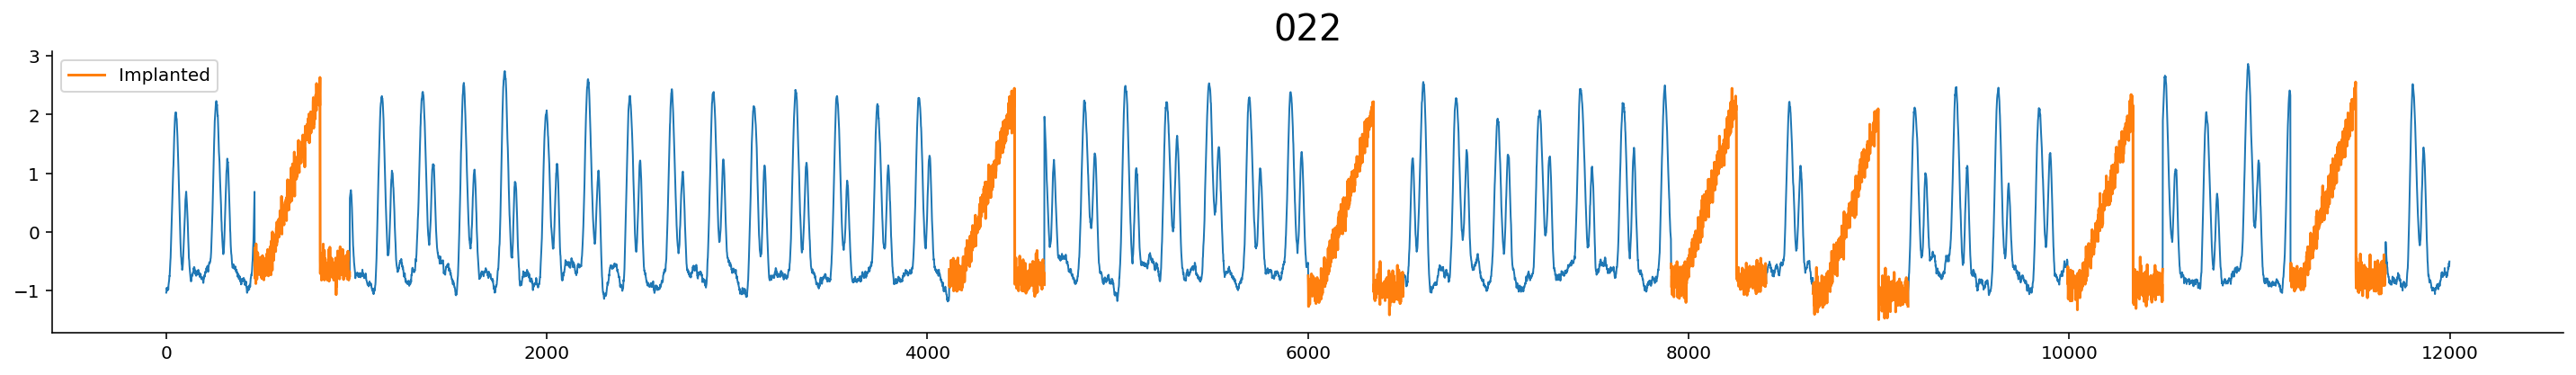

Ground truth: 
	k: 7 
	radius: 21.389427195058595 
	length: 500
--------Motiflets:-------- 1.0
[465, 6001, 7908, 9992, 11163, 8654, 4115]
-----------------------------
Dataset Original Length n:  11999
Dataset Sampled Length n:  11999
../datasets/ground_truth/synthetic/synthetic_023_gt.csv


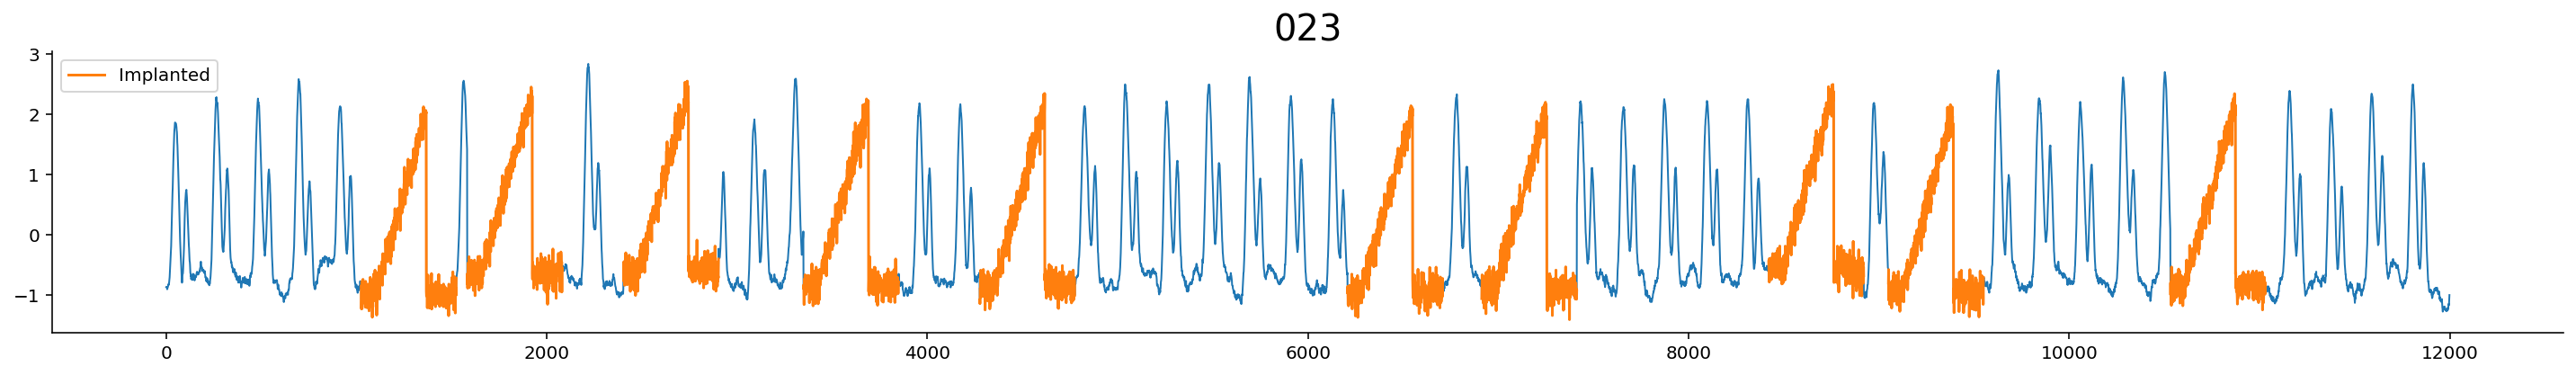

Ground truth: 
	k: 10 
	radius: 23.59475327538086 
	length: 500
--------Motiflets:-------- 1.0
[1025, 10532, 1582, 4275, 9050, 2403, 6913, 6208, 3349, 8421]
-----------------------------
Dataset Original Length n:  7500
Dataset Sampled Length n:  7500
../datasets/ground_truth/synthetic/synthetic_024_gt.csv


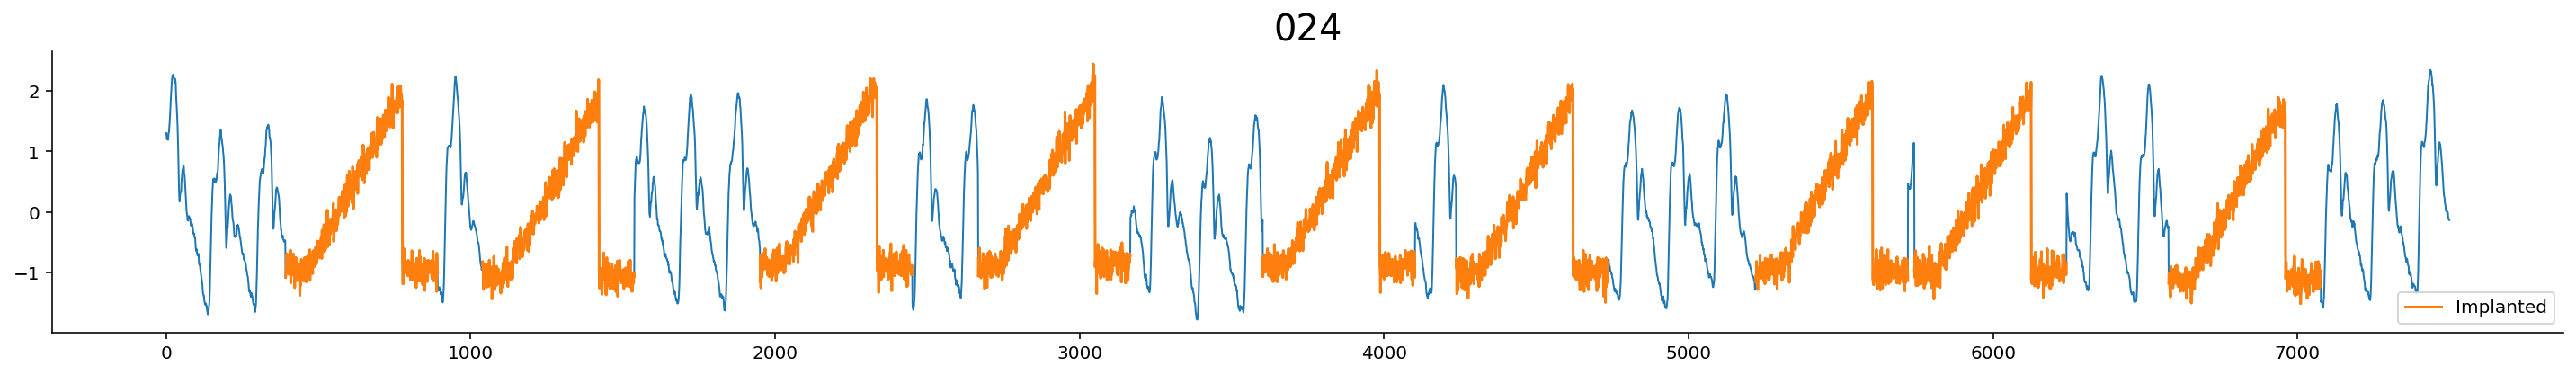

Ground truth: 
	k: 9 
	radius: 22.22653389977051 
	length: 500
--------Motiflets:-------- 1.0
[392, 6577, 3602, 5221, 4237, 1951, 2667, 1038, 5742]
-----------------------------
Dataset Original Length n:  7500
Dataset Sampled Length n:  7500
../datasets/ground_truth/synthetic/synthetic_025_gt.csv


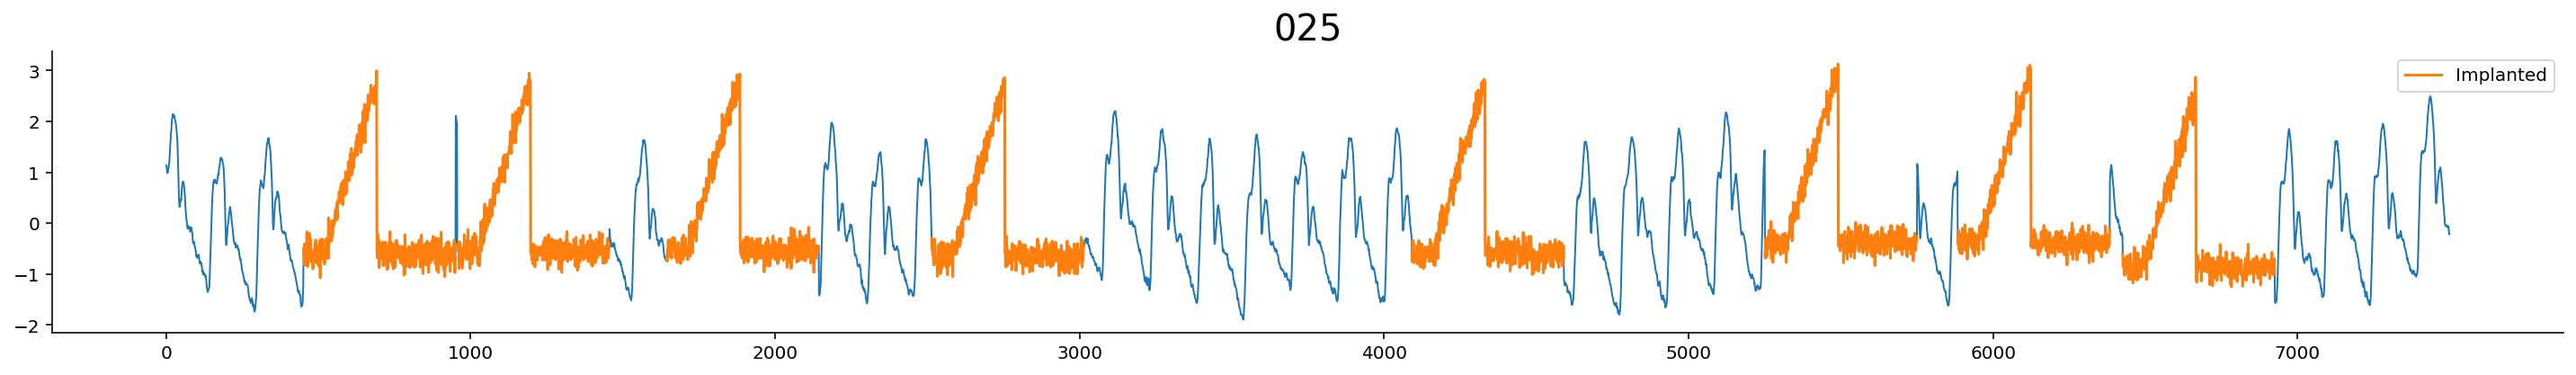

Ground truth: 
	k: 8 
	radius: 24.801626215444337 
	length: 500
--------Motiflets:-------- 1.0
[451, 1644, 2514, 5884, 5251, 956, 4091, 6426]
-----------------------------


In [4]:
# rerun the competitors
rerun_all_jars = False


    
def compute_precision(pred, gt, m):    
    gt_found = np.zeros(len(gt))
    for start in pred:
        for i, g_start in enumerate(gt):            
            if (start <= g_start and start + m >= g_start) \
                or (start <= g_start+m and start >= g_start):
                gt_found[i] = 1
                break

    return np.average(gt_found)
        

for dataset in datasets:
    ds_name = dataset.split("_")[0]
    file = "synthetic/synthetic_" + ds_name + ".csv"

    series, df_gt = ml.read_dataset_with_index(file) # , sampling_factor=np.inf
    ml_plt.plot_dataset(file, series, ds_name=ds_name, ground_truth=df_gt)
    
    dd = np.array(df_gt.Implanted.values[0]).astype(np.int32)
    m = np.int32(dd[0,1]-dd[0,0])

    data = series.to_numpy()
    D_full = ml.compute_distances_full(data, m)
    r_top1 = ml.get_radius(D_full, dd[:,0]) + 1e-8
    k_top1 = len(dd)
        

    print("Ground truth:",
          "\n\tk:", str(k_top1),
          "\n\tradius:", str(r_top1),
          "\n\tlength:", str(m))

    
    # df = pd.DataFrame() # TOP-1 motifs
    file_raw = "synthetic_raw/synthetic_" + ds_name + ".csv"
    dataset = os.getcwd() + '/../datasets/ground_truth/' + file_raw
    
    candidate, candidate_dist, _ = ml.get_approximate_k_motiflet(
            data, m, k_top1, D_full)

    # ml_plt.plot_grid_motiflets(
    #    dataset, data, np.array([candidate]), np.array([0]), D_full, m, ground_truth=df_gt)

    print("--------Motiflets:--------", compute_precision(candidate, dd[:,0], m))    
    print(list(candidate))

    if (rerun_all_jars):
        print("--------Set Finder:--------")
        if rerun_all_jars:
            output = subprocess.call(['java', '-jar', 
               '../jars/set_finder.jar',
               dataset,
               'SetFinder',
               str([r_top1]),
               str(m)])        

        print("--------EMMA:--------")
        if rerun_all_jars:
            output = subprocess.call(['java', '-jar', 
               '../jars/emma.jar',
               dataset,
               str([r_top1]),
               str(m)])   


        print("--------VALMOD:--------")
        ms_valmod = list(get_valmod_motif_set_ranged(data, file, m, max_r=r_top1))    
        print(ms_valmod)

        print("--------LM:--------")        
        if rerun_all_jars:
            output = subprocess.call(['java', '-jar', 
               '../jars/latent_motifs.jar',
               dataset,
               str([r_top1]),
               str(m)])

    print ("-----------------------------")



Now, we show the found motifs

# Comparison

In [7]:
raw = {    
"001_UCR_Anomaly_35000.txt" : {
    "k-Motiflets": [1040, 7339, 6623, 8155, 9985, 8985, 6116, 10734, 1636, 2618], 
    "Set Finder" : [7340, 1637, 2619, 6117, 6624, 8156, 8986, 9986, 10735],  
    "EMMA":        [1040, 1636, 2618, 6623, 7339, 8155, 8985, 9985, 10734],
    "VALMOD" :     [7339, 8155],
    "LM":          [1048,1645,6124,6631,7348,9994]
},
"002_UCR_Anomaly_35000.txt" : {
    "k-Motiflets": [1828, 8736, 4360, 6402, 7071, 5690, 3589], 
    "Set Finder" : [8736, 3589, 4360, 5690, 6402, 7071],    
    "EMMA":        [1828, 3589, 4360, 5690, 6402, 7071],
    "VALMOD" :     [6402, 7071],
    "LM":          [1819,4351,6393,7062]
},
"003_UCR_Anomaly_35000.txt" : {
    "k-Motiflets": [1380, 4021, 7511, 10300, 9689, 4596], 
    "Set Finder" : [7511, 4021, 4596, 9689],
    "EMMA":        [1380, 4021, 4596, 9689],
    "VALMOD" :     [4021, 7511],
    "LM":          [7244]
},
"004_UCR_Anomaly_2500.txt" : {
    "k-Motiflets":  [6872, 7622, 7289, 8367, 6456], 
    "Set Finder" :  [8307, 6395, 6811, 7228, 7560, 9705],
    "EMMA":         [4693, 6414, 6830, 7247, 7579, 9724],
    "VALMOD" :      [6427, 7592, 8338],
    "LM":           [4360,4687,6408,6824,9636]
},
"005_UCR_Anomaly_4000.txt" : {
    "k-Motiflets":  [243, 2224, 5142, 4018, 6881, 5867, 4593, 3481, 7642], 
    "Set Finder" :  [2224, 3481, 4018, 5142, 5867, 6881, 7642],
    "EMMA":         [243, 3481, 4018, 5142, 5867, 6881, 7642],
    "VALMOD" :      [2224, 5867],
    "LM":           [2224,3480,4016,4592,5141,5866,6880,7640]
},
"006_UCR_Anomaly_4000.txt" : {
    "k-Motiflets":  [896, 7667, 7006, 6312, 4717, 5660, 3602, 1532], 
    "Set Finder" :  [7667, 3602, 4717, 5660, 6312, 7006],
    "EMMA":         [896, 1532, 5660, 6312, 7006, 7667],
    "VALMOD" :      [7006, 7667],
    "LM":           [3498]
},
"007_UCR_Anomaly_4000.txt" : {
    "k-Motiflets":  [299, 1745, 976, 6447, 3964, 3212], 
    "Set Finder" :  [1745, 976, 3212, 6447],
    "EMMA":         [299, 976, 3212, 6447],
    "VALMOD" :      [1745, 6447],
    "LM":           [309,986,1755,3222,3974]
},
"008_UCR_Anomaly_4000.txt" : {
    "k-Motiflets":  [496, 6875, 3199, 1842, 7629, 6111, 4944, 2575, 1207], 
    "Set Finder" :  [1842, 1207, 2575, 3199, 4944, 6875, 7629],  
    "EMMA":         [496, 1207, 2575, 3199, 4944, 6875, 7629],
    "VALMOD" :      [1842, 4944],
    "LM":           [494,1205,1840,2573,3197,4942,6110,6873,7627]
},
"009_UCR_Anomaly_4000.txt" : {
    "k-Motiflets":  [657, 3403, 6555, 2622, 1535, 5799], 
    "Set Finder" :  [6555, 1535, 2622, 3403, 5799],    
    "EMMA":         [657, 1535, 2622, 3403, 5799],
    "VALMOD" :      [657, 3403],
    "LM":           [656,1534,2621,3402,5799,6554]
},
"010_UCR_Anomaly_4000.txt" : {
    "k-Motiflets":  [624, 3799, 5870, 2915, 2288, 7298, 4869, 4300], 
    "Set Finder" :  [2915, 2288, 3799, 4300, 4869, 5870, 7298],
    "EMMA":         [624, 2288, 3799, 4300, 4869, 5870, 7298],
    "VALMOD" :      [2291, 3802],
    "LM":           [622,2286,2913,3797,4298,4867,5868,7296]
},
"011_UCR_Anomaly_10000.txt" : {
    "k-Motiflets":  [33, 3735, 6406, 13599, 10781, 4977, 11699, 14402, 1015, 2087], 
    "Set Finder" :  [4977, 1015, 2087, 3735, 6406, 10781, 11699, 13599, 14402],    
    "EMMA":         [33, 1015, 2087, 3735, 6406, 10781, 11699, 13599, 14402],
    "VALMOD" :      [3735, 14402],
    "LM":           [1012,2084,3732,4974,6403,10779,11696,13596,14399]
},
"012_UCR_Anomaly_15000.txt" : {
    "k-Motiflets":  [415, 1158, 11445, 6972, 8948, 9737, 10854], 
    "Set Finder" :  [11445, 1158, 6972, 8948, 9737, 10854],    
    "EMMA":         [415, 1158, 6972, 8948, 9737, 10854],
    "VALMOD" :      [415, 1158],
    "LM":           [411,6968,8944,9732,10849,11441]
},
"013_UCR_Anomaly_15000.txt" : {
    "k-Motiflets": [465, 11072, 12474, 9040, 7769], 
    "Set Finder" : [12474, 9040, 11072],    
    "EMMA":        [465, 9040, 11072],
    "VALMOD" :     [448, 11055],
    "LM":          [467,7771,9042,11074,12476]
},
"014_UCR_Anomaly_8000.txt" : {
    "k-Motiflets": [677, 6299, 14390, 7584, 2545, 12892, 3904, 10761, 1644, 4515],
    "Set Finder" : [2545, 1644, 3904, 4515, 6299, 10761, 12892, 14390],    
    "EMMA":        [677, 1644, 3904, 4515, 6299, 10761, 12892, 14390],
    "VALMOD" :     [2545, 6299],
    "LM":          [1603,2506,7544,10717,12849,14346]
},
"015_UCR_Anomaly_5000.txt" : {
    "k-Motiflets":  [1312, 3238, 8123, 9342, 8785, 6660], 
    "Set Finder" :  [1312, 6660, 8123, 8785, 9342],    
    "EMMA":         [3238, 6660, 8123, 8785, 9342],
    "VALMOD" :      [1312, 3238],
    "LM":           [1813,3741,4359,5941]
},
"016_UCR_Anomaly_5000.txt" : {
    "k-Motiflets":  [1801, 12802, 9674, 14327, 11612, 7901, 6910, 4552, 10263], 
    "Set Finder" :  [7901, 4552, 6910, 10263, 11612, 12802, 14327],   
    "EMMA":         [1801, 4552, 6910, 10263, 11612, 12802, 14327],
    "VALMOD" :      [4550, 7899],
    "LM":           [1798,4549,6907,7898,9671,10260,11609,12799,14324]
},
"017_UCR_Anomaly_5000.txt" : {
    "k-Motiflets":  [920, 7907, 4325, 12274, 2444, 9860, 7146, 9345, 13219, 14395],
    "Set Finder" :  [7907, 2444, 4325, 9345, 9860, 12274, 13219, 14395],   
    "EMMA":         [920, 2444, 4325, 9345, 9860, 12274, 13219, 14395],
    "VALMOD" :      [920, 7907],
    "LM":           [1376]
},
"018_UCR_Anomaly_8000.txt" : {
    "k-Motiflets":  [3015, 6185, 4248, 11659, 6745, 7247, 10167], 
    "Set Finder" :  [4248, 6185, 6745, 7247, 11659],   
    "EMMA":         [3015, 6185, 6745, 7247, 11659],
    "VALMOD" :      [4248, 6185],
    "LM":           [5654]
},
"019_UCR_Anomaly_5000.txt" : {
    "k-Motiflets":  [839, 9448, 4686, 1555, 2798, 5783, 6451, 10043, 8276], 
    "Set Finder" :  [2798, 1555, 4686, 5783, 6451, 8276, 9448, 10043],   
    "EMMA":         [151, 2325, 3625, 5145, 7102, 10827, 11477],
    "VALMOD" :      [20, 4144],
    "LM":           [2122,3643,5163,7120,8877,10845,11494]
},
"020_UCR_Anomaly_5000.txt" : {
    "k-Motiflets": [7826, 7388, 5643, 8703, 3689, 1949], 
    "Set Finder" : [3593, 1200, 1631, 2069, 2508, 4025, 5545, 5982, 6414, 7511, 7946, 8386, 8825, 9479, 10575],   
    "EMMA":        [1417, 1852, 2291, 3376, 3811, 5547, 5981, 6415, 7730, 8165, 8606, 9042, 9479, 10575],
    "VALMOD" :     [1950, 3690, 8045, 8704],
    "LM":          [1120,3512,5683,7428,9397]
},
"021_UCR_Anomaly_5000.txt" : {
    "k-Motiflets": [3494, 4795, 11345, 1101, 4143], 
    "Set Finder" : [11455, 1210, 1863, 2301, 3387, 3820, 4253, 4687, 5993, 7521, 7958, 8396, 8835, 9271, 9706, 10586, 11021],   
    "EMMA":        [810, 1243, 1896, 2334, 3420, 3853, 4286, 4719, 6026, 7336, 7772, 8209, 8650, 9085, 9522, 10619, 11054],
    "VALMOD" :     [1114,  3505,  4807,  6113, 11358],
    "LM":          [764,3374,5981,7291,10573]
},
"022_UCR_Anomaly_4000.txt" : {
    "k-Motiflets":  [465, 6001, 7908, 9992, 11163, 8654, 4115], 
    "Set Finder" :  [3002, 1910, 2349, 3650, 4953, 5603, 7127, 9100, 9538],   
    "EMMA":         [1032, 1899, 2339, 3639, 4943, 5593, 6899, 9090, 9527],
    "VALMOD" :      [2520, 3602, 5556],
    "LM":           [1038,2345,4733,5385,6687,9097,9533]
},
"023_UCR_Anomaly_5000.txt" : {
    "k-Motiflets":  [1025, 10532, 1582, 4275, 9050, 2403, 6913, 6208, 3349, 8421], 
    "Set Finder" :  [4903, 558, 3816, 5552, 7518, 7956, 9486, 11019, 11450],   
    "EMMA":         [122, 3812, 4681, 5117, 5549, 7951, 9483, 11447],
    "VALMOD" :      [231, 11124],
    "LM":           [1021,1580,2399,3345,4271,6204,6909,8417,9045,10528]
},
"024_UCR_Anomaly_3200.txt" : {
    "k-Motiflets": [392, 6577, 3602, 5221, 4237, 1951, 2667, 1038, 5742], 
    "Set Finder" : [6577, 1038, 1951, 2667, 3602, 4237, 5221, 5742],   
    "EMMA":        [392, 1038, 1951, 2667, 3602, 4237, 5221, 5742],
    "VALMOD" :     [4650, 6961],
    "LM":          [344,990,1903,6530]
},
"025_UCR_Anomaly_2800.txt" : {
    "k-Motiflets": [451, 1644, 2514, 5884, 5251, 956, 4091, 6426], 
    "Set Finder" : [1644, 956, 4091, 5251, 5884, 6426],   
    "EMMA":        [3332, 3640, 6879],
    "VALMOD" :     [4689, 7000],
    "LM":          [450,955,1643,2513,4090,5250,5883,6425]
}
}

In [8]:
results = []
for dataset, methods in raw.items():         
    ds_name = dataset.split("_")[0]
    file = "synthetic/synthetic_" + ds_name + ".csv"
    series, df_gt = ml.read_dataset_with_index(file)
    # plot_dataset(file, series, ds_name=ds_name, ground_truth=df_gt)
    
    dd = np.array(df_gt.Implanted.values[0]).astype(np.int32)
    m = np.int32(dd[0,1]-dd[0,0])

    # print("Dataset", "Method", "Precision", "k-ratio")
    for method, motif_set in methods.items():
        precision = compute_precision(motif_set, dd[:,0], m)
        results.append([ds_name, method, precision, len(motif_set) / len(dd[:,0])])
        # print(str(results[-1]))

        
pd.DataFrame(data=np.array(results), 
             columns=["Dataset", "Method", "Precision", "k-ratio"]).to_csv("raw_size_extent/snythetic_precision.csv")

Dataset Original Length n:  11400
Dataset Sampled Length n:  11400
../datasets/ground_truth/synthetic/synthetic_001_gt.csv
Dataset Original Length n:  10000
Dataset Sampled Length n:  10000
../datasets/ground_truth/synthetic/synthetic_002_gt.csv
Dataset Original Length n:  11429
Dataset Sampled Length n:  11429
../datasets/ground_truth/synthetic/synthetic_003_gt.csv
Dataset Original Length n:  10999
Dataset Sampled Length n:  10999
../datasets/ground_truth/synthetic/synthetic_004_gt.csv
Dataset Original Length n:  8183
Dataset Sampled Length n:  8183
../datasets/ground_truth/synthetic/synthetic_005_gt.csv
Dataset Original Length n:  8183
Dataset Sampled Length n:  8183
../datasets/ground_truth/synthetic/synthetic_006_gt.csv
Dataset Original Length n:  8183
Dataset Sampled Length n:  8183
../datasets/ground_truth/synthetic/synthetic_007_gt.csv
Dataset Original Length n:  8183
Dataset Sampled Length n:  8183
../datasets/ground_truth/synthetic/synthetic_008_gt.csv
Dataset Original Length 

# Full results

In [9]:
df = pd.read_csv("raw_size_extent/snythetic_precision.csv", index_col=0)
df

Dataset       Method  Precision  k-ratio
0          1  k-Motiflets       1.00    1.000
1          1   Set Finder       0.90    0.900
2          1         EMMA       0.90    0.900
3          1       VALMOD       0.20    0.200
4          1           LM       0.50    0.600
..       ...          ...        ...      ...
120       25  k-Motiflets       1.00    1.000
121       25   Set Finder       0.75    0.750
122       25         EMMA       0.25    0.375
123       25       VALMOD       0.00    0.250
124       25           LM       1.00    1.000

[125 rows x 4 columns]

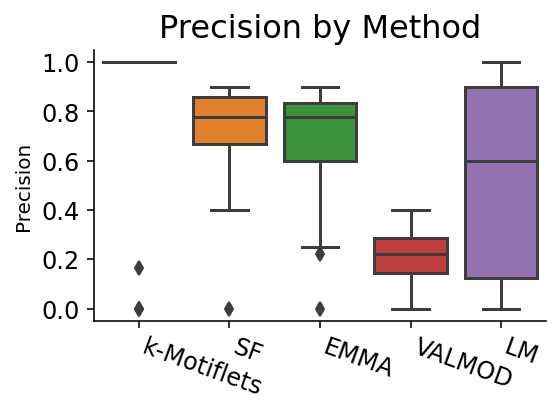

In [10]:
df.Method[df.Method == "Set Finder"] = "SF"
df.Method[df.Method == "EMMA"] = "EMMA"

fig, ax = plt.subplots(figsize=(4,3))
sns.boxplot(x=df.Method, y=df.Precision, ax=ax)
ax.set_title("Precision by Method", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(rotation=-20, fontsize=12, ha='left')
plt.xlabel("")
sns.despine()
plt.tight_layout()
plt.savefig("images/boxplot_synthetic_pre.pdf")

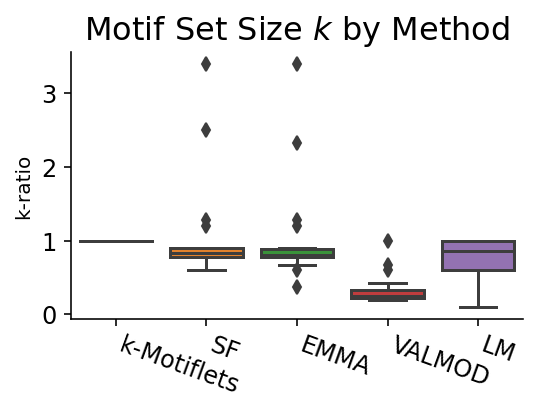

In [11]:
fig, ax = plt.subplots(figsize=(4,3))
sns.boxplot(x=df.Method, y=df["k-ratio"], ax= ax)
ax.set_title("Motif Set Size $k$ by Method", fontsize=16)
plt.xticks(rotation=-20, fontsize=12, ha='left')
plt.yticks(fontsize=12)
plt.xlabel("")
sns.despine()
plt.tight_layout()
plt.savefig("images/boxplot_synthetic_k.pdf")